In [2]:
import import_ipynb
from dataprocess import dataprocess, port_period
import pandas_datareader.data as reader
from cvxopt import matrix, solvers
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BusinessDay as Bday
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
import performanceanalytics.statistics as pas
import performanceanalytics.table.table as pat
import matplotlib.pyplot as plt
import seaborn as sns
import quantstats as qs

importing Jupyter notebook from dataprocess.ipynb


In [3]:
#Impact of Term Structure
tickers = ['DBA', 'EPP', 'EWJ', 'FEZ', 'FXE', 'GLD', 'ILF', 'QQQ','SHV', 'SPY','USO', 'XBI']
start = dt.date(2007,7,2)
backtest_start = start-120*Bday()
end = dt.date(2021,10,31)
backtest_data = yf.download(tickers,start,end)['Adj Close'].resample('B').interpolate(method='linear')
rdays = [40,80,120]

returns = []
weights = []
pnl = []

for r in rdays:
    #clean data
    value = 100
    p = pd.DataFrame(index=pd.date_range('10/26/2021','10/29/2021'),columns = tickers)
    temp = port_period(r,40,0,1).unstack().unstack()
    for i in temp.index:
        temp.loc[i]=value*temp.loc[i]/backtest_data.loc[i]
        value = (temp.loc[i]*backtest_data.loc[i+4*Bday()]).sum()
    temp = temp.resample('B').ffill()
    
    w = pd.merge(temp,p,how='outer').fillna(method = 'ffill')
    w.index = backtest_data.index
    weights.append([w])
    
    #daily return
    p1 = pd.DataFrame()
    p1 = w*backtest_data
    p1['return'] = p1.DBA+p1.EPP+p1.EWJ+p1.FEZ+p1.FXE+p1.GLD+p1.ILF+p1.SHV+p1.SPY+p1.USO+p1.XBI+p1.QQQ
    ret_vec = p1['return'].pct_change()[1:].values
    returns.append(ret_vec)
    
    #daily P&L
    pnl_vec = (p1['return']-p1['return'].shift(1)).fillna(0).values
    pnl.append(pnl_vec)
  
    
return_df = pd.DataFrame(backtest_data['SPY'].pct_change()[1:].values)
return_df.columns = ['SPY']
counter = 0
for arr in returns:
    return_df.insert(counter+1,'Return Lookback: {}'.format(rdays[counter]),arr)
    counter+=1
    
spy_pos = 100/backtest_data['SPY'][0]
pnl_df = pd.DataFrame((spy_pos*(backtest_data['SPY']-backtest_data['SPY'].shift(1))).fillna(0).values)
pnl_df.columns = ['SPY']
counter1 = 0
for i in pnl:
    pnl_df.insert(counter1+1,'P&L Lookback: {}'.format(rdays[counter1]),i)
    counter1+=1

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -3.1549e-04 -5.7764e+01  6e+01  2e-16  5e-16
 1: -3.4160e-04 -6.2677e-01  6e-01  6e-16  5e-16
 2: -2.4924e-03 -4.9390e-02  5e-02  8e-16  4e-17
 3: -1.4395e-02 -2.1658e-02  7e-03  9e-16  3e-18
 4: -1.6836e-02 -1.7936e-02  1e-03  2e-15  1e-18
 5: -1.7308e-02 -1.7433e-02  1e-04  1e-15  9e-19
 6: -1.7355e-02 -1.7364e-02  9e-06  2e-16  2e-18
 7: -1.7359e-02 -1.7360e-02  5e-07  2e-15  2e-18
 8: -1.7360e-02 -1.7360e-02  2e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.7011e-04 -5.7667e+01  6e+01  2e-16  7e-16
 1: -8.0398e-04 -6.3532e-01  6e-01  9e-16  6e-16
 2: -3.5231e-03 -5.4285e-02  5e-02  3e-16  5e-17
 3: -1.7762e-02 -2.5991e-02  8e-03  1e-15  6e-18
 4: -2.1705e-02 -2.2775e-02  1e-03  2e-16  1e-18
 5: -2.2040e-02 -2.2322e-02  3e-04  6e-16  2e-18
 6: -2.2183e-02 -2.2220e-02  4e-05  4e-16  1e-18
 7: -2.2200e-02 -2.2201e-02  1e-06  1e-15  1e-18
 8: -2.2201e-02 -2.2201e-02  1e-08  1e-15  2e-1

     pcost       dcost       gap    pres   dres
 0: -1.8908e-03 -5.8250e+01  6e+01  3e-16  6e-16
 1: -1.9962e-03 -7.1519e-01  7e-01  1e-15  1e-15
 2: -8.7405e-03 -9.1680e-02  8e-02  1e-15  1e-16
 3: -2.7834e-02 -4.1982e-02  1e-02  1e-15  2e-17
 4: -3.4642e-02 -3.6751e-02  2e-03  1e-15  2e-18
 5: -3.5846e-02 -3.5961e-02  1e-04  7e-16  5e-18
 6: -3.5897e-02 -3.5920e-02  2e-05  7e-16  2e-18
 7: -3.5906e-02 -3.5907e-02  1e-06  5e-16  4e-18
 8: -3.5906e-02 -3.5906e-02  1e-08  3e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9783e-03 -5.7276e+01  6e+01  8e-17  7e-16
 1: -2.0415e-03 -6.5497e-01  7e-01  7e-16  9e-16
 2: -6.6638e-03 -6.6681e-02  6e-02  9e-16  8e-17
 3: -2.5577e-02 -3.6210e-02  1e-02  6e-16  7e-18
 4: -3.1133e-02 -3.2331e-02  1e-03  9e-16  2e-18
 5: -3.1694e-02 -3.1767e-02  7e-05  7e-16  2e-18
 6: -3.1726e-02 -3.1726e-02  8e-07  3e-16  1e-18
 7: -3.1726e-02 -3.1726e-02  8e-09  7e-16  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.8658e-03 -5.9320e+01  6e+01  2e-16  4e-16
 1: -1.9233e-03 -6.9846e-01  7e-01  5e-16  7e-16
 2: -5.7871e-03 -7.8173e-02  7e-02  4e-16  8e-17
 3: -1.7672e-02 -3.0196e-02  1e-02  5e-16  1e-17
 4: -2.2390e-02 -2.3806e-02  1e-03  1e-15  2e-18
 5: -2.2813e-02 -2.2955e-02  1e-04  2e-16  5e-18
 6: -2.2861e-02 -2.2869e-02  8e-06  5e-16  3e-18
 7: -2.2865e-02 -2.2865e-02  2e-07  1e-15  2e-18
 8: -2.2865e-02 -2.2865e-02  2e-09  9e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7575e-04 -5.9186e+01  6e+01  7e-16  4e-16
 1: -5.5548e-04 -7.0264e-01  7e-01  4e-16  9e-16
 2: -5.8226e-03 -8.1486e-02  8e-02  3e-16  9e-17
 3: -1.9485e-02 -3.1502e-02  1e-02  7e-16  1e-17
 4: -2.5063e-02 -2.6760e-02  2e-03  4e-16  3e-18
 5: -2.5786e-02 -2.5908e-02  1e-04  9e-16  4e-18
 6: -2.5839e-02 -2.5843e-02  4e-06  2e-15  2e-18
 7: -2.5841e-02 -2.5841e-02  5e-08  9e-16  3e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0:  4.4932e-03 -5.6035e+01  6e+01  4e-16  5e-16
 1:  4.3270e-03 -6.8691e-01  7e-01  6e-16  7e-16
 2: -6.1383e-03 -9.3880e-02  9e-02  8e-16  8e-17
 3: -3.0794e-02 -4.4927e-02  1e-02  7e-16  1e-17
 4: -3.8109e-02 -3.9131e-02  1e-03  1e-15  2e-18
 5: -3.8556e-02 -3.8624e-02  7e-05  2e-15  3e-18
 6: -3.8589e-02 -3.8590e-02  9e-07  3e-15  2e-18
 7: -3.8589e-02 -3.8589e-02  9e-09  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8555e-03 -5.7492e+01  6e+01  6e-16  5e-16
 1:  3.6233e-03 -7.5839e-01  8e-01  3e-16  6e-16
 2: -9.5144e-03 -1.2341e-01  1e-01  4e-16  9e-17
 3: -3.6337e-02 -5.5251e-02  2e-02  1e-15  1e-17
 4: -4.6045e-02 -4.7951e-02  2e-03  7e-16  4e-18
 5: -4.6985e-02 -4.7234e-02  2e-04  1e-15  2e-18
 6: -4.7036e-02 -4.7100e-02  6e-05  9e-16  4e-18
 7: -4.7068e-02 -4.7071e-02  4e-06  2e-15  3e-18
 8: -4.7069e-02 -4.7069e-02  1e-07  5e-16  6e-18
 9: -4.7069e-02 -4.7069e-02  2e-09  1e-15  6e-1

     pcost       dcost       gap    pres   dres
 0: -2.0120e-03 -6.2934e+01  6e+01  5e-16  7e-16
 1: -2.3574e-03 -9.1019e-01  9e-01  1e-15  1e-15
 2: -1.8300e-02 -1.3518e-01  1e-01  6e-16  2e-16
 3: -4.8031e-02 -6.6041e-02  2e-02  2e-16  1e-17
 4: -5.7195e-02 -5.9107e-02  2e-03  9e-16  6e-18
 5: -5.8154e-02 -5.8282e-02  1e-04  1e-15  3e-18
 6: -5.8219e-02 -5.8226e-02  7e-06  4e-16  4e-18
 7: -5.8224e-02 -5.8224e-02  2e-07  7e-16  5e-18
 8: -5.8224e-02 -5.8224e-02  3e-09  7e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.2313e-04 -6.2740e+01  6e+01  9e-16  7e-16
 1: -1.1970e-03 -9.3560e-01  9e-01  2e-15  1e-15
 2: -1.8118e-02 -1.4427e-01  1e-01  2e-16  1e-16
 3: -4.8634e-02 -6.8405e-02  2e-02  1e-15  2e-17
 4: -5.9022e-02 -6.1245e-02  2e-03  4e-16  5e-18
 5: -6.0128e-02 -6.0256e-02  1e-04  1e-15  7e-18
 6: -6.0182e-02 -6.0186e-02  4e-06  1e-15  5e-18
 7: -6.0184e-02 -6.0184e-02  4e-08  7e-16  4e-18
Optimal solution found.
     pcost       dcost 

 1: -8.6610e-04 -7.3707e-01  7e-01  6e-16  7e-16
 2: -4.7406e-03 -9.3328e-02  9e-02  1e-15  8e-17
 3: -1.5877e-02 -2.8752e-02  1e-02  9e-16  1e-17
 4: -2.1756e-02 -2.4243e-02  2e-03  4e-16  3e-18
 5: -2.2594e-02 -2.2807e-02  2e-04  9e-16  3e-18
 6: -2.2663e-02 -2.2687e-02  2e-05  5e-16  3e-18
 7: -2.2675e-02 -2.2675e-02  7e-07  8e-16  5e-18
 8: -2.2675e-02 -2.2675e-02  8e-09  3e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9783e-04 -6.2314e+01  6e+01  8e-16  7e-16
 1: -8.3464e-04 -7.0615e-01  7e-01  2e-15  1e-15
 2: -3.6514e-03 -7.1957e-02  7e-02  1e-15  1e-16
 3: -1.5396e-02 -2.8677e-02  1e-02  2e-15  2e-17
 4: -2.0040e-02 -2.2673e-02  3e-03  5e-16  5e-18
 5: -2.0953e-02 -2.1135e-02  2e-04  9e-16  3e-18
 6: -2.1018e-02 -2.1026e-02  7e-06  5e-16  2e-18
 7: -2.1020e-02 -2.1020e-02  2e-07  1e-15  1e-18
 8: -2.1020e-02 -2.1020e-02  3e-09  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.2206e-05 -6.3635

     pcost       dcost       gap    pres   dres
 0:  2.2359e-04 -6.5498e+01  7e+01  1e-15  6e-16
 1:  1.7384e-04 -7.6307e-01  8e-01  1e-15  1e-15
 2: -3.5368e-03 -9.1682e-02  9e-02  7e-16  1e-16
 3: -1.8043e-02 -3.1520e-02  1e-02  2e-15  1e-17
 4: -2.2655e-02 -2.4301e-02  2e-03  9e-16  2e-18
 5: -2.3551e-02 -2.3705e-02  2e-04  1e-15  3e-18
 6: -2.3596e-02 -2.3612e-02  2e-05  7e-16  7e-19
 7: -2.3602e-02 -2.3603e-02  8e-07  1e-15  2e-18
 8: -2.3603e-02 -2.3603e-02  1e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0760e-04 -6.4916e+01  6e+01  4e-16  8e-16
 1: -2.8651e-04 -7.5949e-01  8e-01  2e-15  8e-16
 2: -5.9971e-03 -9.2894e-02  9e-02  1e-15  1e-16
 3: -2.7392e-02 -3.9819e-02  1e-02  1e-15  8e-18
 4: -3.2976e-02 -3.4595e-02  2e-03  1e-15  2e-18
 5: -3.3763e-02 -3.3984e-02  2e-04  1e-15  4e-18
 6: -3.3816e-02 -3.3870e-02  5e-05  1e-15  3e-18
 7: -3.3842e-02 -3.3845e-02  2e-06  3e-16  2e-18
 8: -3.3844e-02 -3.3844e-02  1e-07  3e-16  3e-1

 1:  4.2234e-04 -6.8545e-01  7e-01  3e-15  8e-16
 2: -1.7508e-03 -4.6612e-02  4e-02  2e-15  6e-17
 3: -1.8951e-02 -2.6176e-02  7e-03  1e-15  4e-18
 4: -2.1613e-02 -2.2905e-02  1e-03  2e-15  3e-18
 5: -2.2018e-02 -2.2140e-02  1e-04  2e-16  2e-18
 6: -2.2086e-02 -2.2089e-02  3e-06  1e-15  2e-18
 7: -2.2088e-02 -2.2089e-02  3e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.5296e-04 -6.4669e+01  6e+01  9e-16  8e-16
 1:  5.3281e-04 -7.0116e-01  7e-01  9e-16  7e-16
 2: -1.1728e-03 -5.5876e-02  5e-02  2e-15  5e-17
 3: -1.3824e-02 -2.3423e-02  1e-02  4e-16  5e-18
 4: -1.6960e-02 -1.8068e-02  1e-03  9e-16  2e-18
 5: -1.7305e-02 -1.7523e-02  2e-04  9e-16  3e-18
 6: -1.7355e-02 -1.7369e-02  1e-05  9e-16  2e-18
 7: -1.7360e-02 -1.7360e-02  1e-07  3e-16  2e-18
 8: -1.7360e-02 -1.7360e-02  1e-09  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4285e-04 -6.2424e+01  6e+01  8e-16  6e-16
 1:  3.2657e-04 -6.8026

     pcost       dcost       gap    pres   dres
 0: -3.0477e-04 -6.3176e+01  6e+01  1e-15  6e-16
 1: -3.2571e-04 -6.8012e-01  7e-01  9e-16  1e-15
 2: -2.0871e-03 -4.9003e-02  5e-02  2e-15  8e-17
 3: -1.4391e-02 -2.1752e-02  7e-03  1e-15  8e-18
 4: -1.8151e-02 -1.9476e-02  1e-03  1e-15  1e-18
 5: -1.8592e-02 -1.8786e-02  2e-04  7e-16  1e-18
 6: -1.8680e-02 -1.8686e-02  7e-06  5e-16  1e-18
 7: -1.8683e-02 -1.8683e-02  6e-07  2e-15  2e-18
 8: -1.8683e-02 -1.8683e-02  3e-08  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2076e-04 -6.2756e+01  6e+01  1e-15  8e-16
 1: -5.3175e-04 -6.7190e-01  7e-01  1e-15  1e-15
 2: -1.4693e-03 -4.5539e-02  4e-02  8e-16  7e-17
 3: -8.4303e-03 -1.4638e-02  6e-03  3e-16  5e-18
 4: -1.1041e-02 -1.1936e-02  9e-04  2e-16  1e-18
 5: -1.1481e-02 -1.1548e-02  7e-05  2e-15  1e-18
 6: -1.1517e-02 -1.1519e-02  2e-06  6e-16  9e-19
 7: -1.1518e-02 -1.1518e-02  3e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost 

 4: -3.0056e-02 -3.1548e-02  1e-03  1e-15  3e-18
 5: -3.0136e-02 -3.0737e-02  6e-04  1e-15  2e-18
 6: -3.0401e-02 -3.0428e-02  3e-05  2e-15  3e-18
 7: -3.0412e-02 -3.0413e-02  1e-06  5e-16  2e-18
 8: -3.0413e-02 -3.0413e-02  7e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.2341e-04 -6.1871e+01  6e+01  1e-15  6e-16
 1: -8.4193e-04 -6.6730e-01  7e-01  3e-15  1e-15
 2: -2.4112e-03 -4.8471e-02  5e-02  1e-15  1e-16
 3: -1.4264e-02 -2.1794e-02  8e-03  5e-16  1e-17
 4: -1.8759e-02 -1.9638e-02  9e-04  2e-15  2e-18
 5: -1.8961e-02 -1.9171e-02  2e-04  1e-15  1e-18
 6: -1.9058e-02 -1.9061e-02  4e-06  1e-15  2e-18
 7: -1.9059e-02 -1.9059e-02  4e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4304e-04 -6.0353e+01  6e+01  4e-16  6e-16
 1: -6.7034e-04 -6.5868e-01  7e-01  9e-16  7e-16
 2: -2.9192e-03 -5.2696e-02  5e-02  1e-15  5e-17
 3: -1.6807e-02 -2.4376e-02  8e-03  7e-16  3e-18
 4: -2.0905e-02 -2.1802

 1: -1.1019e-03 -7.3001e-01  7e-01  2e-15  7e-16
 2: -3.1691e-03 -6.5931e-02  6e-02  2e-15  6e-17
 3: -1.4682e-02 -2.3661e-02  9e-03  2e-16  4e-18
 4: -1.9509e-02 -2.0187e-02  7e-04  2e-16  9e-19
 5: -1.9845e-02 -1.9873e-02  3e-05  7e-16  1e-18
 6: -1.9860e-02 -1.9860e-02  6e-07  9e-16  2e-18
 7: -1.9860e-02 -1.9860e-02  6e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.8114e-04 -6.7270e+01  7e+01  9e-16  9e-16
 1: -6.9646e-04 -7.1635e-01  7e-01  1e-15  1e-15
 2: -1.9894e-03 -4.4101e-02  4e-02  1e-15  7e-17
 3: -1.1514e-02 -1.8469e-02  7e-03  4e-16  7e-18
 4: -1.5281e-02 -1.5930e-02  6e-04  1e-15  9e-19
 5: -1.5623e-02 -1.5656e-02  3e-05  8e-16  1e-18
 6: -1.5636e-02 -1.5638e-02  1e-06  4e-16  1e-18
 7: -1.5637e-02 -1.5637e-02  2e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.2999e-04 -6.6494e+01  7e+01  1e-15  9e-16
 1: -6.6311e-04 -7.3605e-01  7e-01  4e-16  6e-16
 2: -3.2478e-03 -6.3396

     pcost       dcost       gap    pres   dres
 0:  8.1273e-04 -6.2318e+01  6e+01  5e-16  6e-16
 1:  7.7383e-04 -6.8517e-01  7e-01  2e-16  9e-16
 2: -2.3899e-03 -5.9943e-02  6e-02  9e-16  7e-17
 3: -2.0316e-02 -3.1010e-02  1e-02  1e-15  8e-18
 4: -2.5458e-02 -2.6577e-02  1e-03  2e-15  2e-18
 5: -2.6013e-02 -2.6069e-02  6e-05  3e-15  4e-18
 6: -2.6046e-02 -2.6052e-02  7e-06  1e-15  2e-18
 7: -2.6047e-02 -2.6047e-02  2e-07  1e-15  2e-18
 8: -2.6047e-02 -2.6047e-02  2e-09  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1688e-03 -6.2249e+01  6e+01  1e-15  6e-16
 1:  1.1249e-03 -6.7761e-01  7e-01  1e-15  8e-16
 2: -2.4754e-03 -5.5609e-02  5e-02  5e-16  6e-17
 3: -2.2454e-02 -3.2848e-02  1e-02  1e-15  5e-18
 4: -2.6061e-02 -2.7022e-02  1e-03  1e-15  4e-18
 5: -2.6449e-02 -2.6507e-02  6e-05  2e-15  4e-18
 6: -2.6470e-02 -2.6473e-02  4e-06  2e-15  3e-18
 7: -2.6471e-02 -2.6471e-02  8e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -4.7567e-04 -6.1744e+01  6e+01  1e-15  8e-16
 1: -4.8602e-04 -6.5271e-01  7e-01  9e-16  6e-16
 2: -1.4033e-03 -3.8716e-02  4e-02  1e-15  3e-17
 3: -9.7581e-03 -1.6337e-02  7e-03  4e-16  5e-18
 4: -1.1795e-02 -1.2597e-02  8e-04  7e-16  1e-18
 5: -1.2115e-02 -1.2167e-02  5e-05  9e-16  1e-18
 6: -1.2136e-02 -1.2140e-02  4e-06  5e-16  1e-18
 7: -1.2137e-02 -1.2137e-02  3e-07  4e-16  1e-18
 8: -1.2137e-02 -1.2137e-02  9e-09  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7902e-04 -6.1778e+01  6e+01  1e-15  6e-16
 1: -1.9791e-04 -6.6435e-01  7e-01  8e-16  8e-16
 2: -1.8188e-03 -4.7880e-02  5e-02  1e-15  5e-17
 3: -1.4706e-02 -2.2237e-02  8e-03  1e-15  4e-18
 4: -1.8012e-02 -1.8538e-02  5e-04  4e-16  1e-18
 5: -1.8283e-02 -1.8331e-02  5e-05  9e-16  1e-18
 6: -1.8307e-02 -1.8311e-02  4e-06  8e-16  1e-18
 7: -1.8309e-02 -1.8309e-02  3e-07  9e-16  1e-18
 8: -1.8309e-02 -1.8309e-02  4e-08  3e-16  1e-1

 1: -7.2855e-04 -6.9347e-01  7e-01  2e-15  1e-15
 2: -2.7694e-03 -5.5354e-02  5e-02  1e-15  7e-17
 3: -1.4435e-02 -2.1162e-02  7e-03  9e-16  5e-18
 4: -1.7461e-02 -1.8113e-02  7e-04  1e-15  2e-18
 5: -1.7708e-02 -1.7737e-02  3e-05  2e-15  1e-18
 6: -1.7726e-02 -1.7727e-02  6e-07  6e-16  2e-18
 7: -1.7727e-02 -1.7727e-02  6e-09  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1610e-04 -6.3239e+01  6e+01  8e-16  9e-16
 1: -3.3826e-04 -6.9656e-01  7e-01  3e-15  9e-16
 2: -2.1033e-03 -5.8064e-02  6e-02  8e-16  7e-17
 3: -1.0927e-02 -1.9138e-02  8e-03  1e-15  8e-18
 4: -1.3989e-02 -1.4884e-02  9e-04  6e-16  2e-18
 5: -1.4222e-02 -1.4318e-02  1e-04  1e-15  2e-18
 6: -1.4251e-02 -1.4257e-02  7e-06  2e-16  1e-18
 7: -1.4254e-02 -1.4254e-02  2e-07  9e-16  2e-18
 8: -1.4254e-02 -1.4254e-02  2e-09  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.2608e-05 -6.3123e+01  6e+01  4e-16  8e-16
 1:  2.6275e-05 -6.8111

     pcost       dcost       gap    pres   dres
 0: -8.6265e-05 -6.1390e+01  6e+01  1e-15  9e-16
 1: -1.0194e-04 -6.5091e-01  7e-01  8e-16  1e-15
 2: -1.4844e-03 -4.0125e-02  4e-02  2e-15  6e-17
 3: -1.3905e-02 -2.0236e-02  6e-03  3e-15  5e-18
 4: -1.6489e-02 -1.7285e-02  8e-04  2e-16  2e-18
 5: -1.6796e-02 -1.6821e-02  3e-05  1e-15  2e-18
 6: -1.6807e-02 -1.6807e-02  3e-07  2e-15  9e-19
 7: -1.6807e-02 -1.6807e-02  3e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3463e-04 -5.9626e+01  6e+01  1e-15  5e-16
 1: -2.6072e-04 -6.5449e-01  7e-01  2e-16  7e-16
 2: -2.4313e-03 -5.8631e-02  6e-02  1e-15  6e-17
 3: -1.7058e-02 -2.8623e-02  1e-02  1e-15  7e-18
 4: -2.2498e-02 -2.3711e-02  1e-03  2e-15  2e-18
 5: -2.2813e-02 -2.2988e-02  2e-04  1e-15  1e-18
 6: -2.2897e-02 -2.2900e-02  4e-06  1e-15  2e-18
 7: -2.2898e-02 -2.2898e-02  4e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4199e-04 -5.9347e

 0:  2.9945e-04 -6.6085e+01  7e+01  8e-16  9e-16
 1:  2.0051e-04 -7.9769e-01  8e-01  5e-16  1e-15
 2: -6.5347e-03 -1.0459e-01  1e-01  1e-15  2e-16
 3: -2.7970e-02 -4.5361e-02  2e-02  1e-15  2e-17
 4: -3.6549e-02 -3.9874e-02  3e-03  1e-15  3e-18
 5: -3.7177e-02 -3.8012e-02  8e-04  6e-16  2e-18
 6: -3.7546e-02 -3.7648e-02  1e-04  9e-16  3e-18
 7: -3.7595e-02 -3.7597e-02  2e-06  9e-16  3e-18
 8: -3.7596e-02 -3.7596e-02  2e-08  5e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4472e-04 -6.6223e+01  7e+01  1e-15  4e-16
 1:  2.6276e-04 -7.7657e-01  8e-01  1e-15  9e-16
 2: -5.6346e-03 -9.2503e-02  9e-02  9e-16  1e-16
 3: -2.8213e-02 -4.0345e-02  1e-02  1e-15  1e-17
 4: -3.4426e-02 -3.6255e-02  2e-03  7e-16  4e-18
 5: -3.5114e-02 -3.5345e-02  2e-04  1e-15  4e-18
 6: -3.5203e-02 -3.5219e-02  2e-05  8e-16  1e-18
 7: -3.5210e-02 -3.5210e-02  3e-07  1e-15  3e-18
 8: -3.5210e-02 -3.5210e-02  3e-09  3e-16  2e-18
Optimal solution found.
     pcost       dcost

 1: -2.7881e-05 -6.2662e-01  6e-01  6e-16  9e-16
 2: -1.8396e-03 -4.9370e-02  5e-02  6e-16  7e-17
 3: -1.1162e-02 -2.1063e-02  1e-02  9e-16  1e-17
 4: -1.5275e-02 -1.6577e-02  1e-03  8e-16  1e-18
 5: -1.5930e-02 -1.6001e-02  7e-05  5e-16  2e-18
 6: -1.5968e-02 -1.5969e-02  9e-07  7e-16  2e-18
 7: -1.5969e-02 -1.5969e-02  9e-09  2e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7986e-05 -5.7273e+01  6e+01  5e-16  6e-16
 1: -8.1630e-06 -6.6151e-01  7e-01  2e-16  8e-16
 2: -5.6483e-03 -8.1301e-02  8e-02  9e-16  9e-17
 3: -2.5374e-02 -3.8815e-02  1e-02  1e-15  1e-17
 4: -2.9668e-02 -3.2264e-02  3e-03  2e-15  3e-18
 5: -3.0647e-02 -3.0787e-02  1e-04  3e-15  2e-18
 6: -3.0688e-02 -3.0690e-02  2e-06  9e-16  3e-18
 7: -3.0689e-02 -3.0689e-02  2e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6420e-05 -5.7756e+01  6e+01  7e-16  5e-16
 1:  8.6172e-06 -6.5262e-01  7e-01  1e-15  7e-16
 2: -4.4155e-03 -7.1284

 2: -6.5535e-03 -7.8524e-02  7e-02  1e-15  8e-17
 3: -2.4529e-02 -3.4956e-02  1e-02  1e-15  8e-18
 4: -2.9519e-02 -3.1437e-02  2e-03  1e-15  2e-18
 5: -3.0326e-02 -3.0607e-02  3e-04  1e-15  3e-18
 6: -3.0465e-02 -3.0474e-02  9e-06  9e-16  1e-18
 7: -3.0470e-02 -3.0470e-02  4e-07  8e-16  3e-18
 8: -3.0470e-02 -3.0470e-02  4e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6630e-03 -5.7777e+01  6e+01  5e-16  6e-16
 1: -1.7176e-03 -6.5313e-01  7e-01  8e-16  8e-16
 2: -5.8705e-03 -6.7854e-02  6e-02  3e-16  8e-17
 3: -2.2613e-02 -3.1750e-02  9e-03  1e-15  8e-18
 4: -2.6348e-02 -2.7791e-02  1e-03  5e-16  2e-18
 5: -2.7140e-02 -2.7183e-02  4e-05  4e-16  1e-18
 6: -2.7158e-02 -2.7159e-02  7e-07  9e-16  2e-18
 7: -2.7158e-02 -2.7158e-02  7e-09  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4206e-03 -5.7847e+01  6e+01  2e-16  6e-16
 1: -1.4572e-03 -6.5035e-01  6e-01  4e-16  8e-16
 2: -4.2990e-03 -6.6286

 1:  7.7530e-05 -6.1855e-01  6e-01  7e-16  1e-15
 2: -1.4211e-03 -5.1547e-02  5e-02  5e-16  8e-17
 3: -1.1000e-02 -2.0459e-02  9e-03  1e-15  1e-17
 4: -1.4457e-02 -1.6681e-02  2e-03  2e-16  2e-18
 5: -1.5331e-02 -1.5511e-02  2e-04  7e-16  7e-19
 6: -1.5403e-02 -1.5412e-02  9e-06  1e-15  2e-18
 7: -1.5406e-02 -1.5406e-02  3e-07  3e-16  9e-19
 8: -1.5406e-02 -1.5406e-02  3e-09  6e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.6435e-04 -5.7039e+01  6e+01  6e-17  5e-16
 1:  2.4027e-04 -6.2127e-01  6e-01  7e-16  6e-16
 2: -1.7912e-03 -5.1811e-02  5e-02  7e-16  5e-17
 3: -1.5206e-02 -2.5483e-02  1e-02  1e-15  6e-18
 4: -1.7601e-02 -1.8891e-02  1e-03  6e-16  1e-18
 5: -1.8062e-02 -1.8277e-02  2e-04  1e-15  2e-18
 6: -1.8153e-02 -1.8162e-02  9e-06  9e-16  2e-18
 7: -1.8157e-02 -1.8158e-02  6e-07  1e-15  1e-18
 8: -1.8157e-02 -1.8157e-02  4e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2344e-04 -5.6930

     pcost       dcost       gap    pres   dres
 0:  1.4089e-03 -5.8492e+01  6e+01  4e-16  6e-16
 1:  1.1196e-03 -8.6605e-01  9e-01  7e-16  8e-16
 2: -1.3535e-02 -1.5127e-01  1e-01  1e-15  1e-16
 3: -3.2333e-02 -5.8646e-02  3e-02  2e-15  2e-17
 4: -3.9945e-02 -4.4861e-02  5e-03  2e-15  6e-18
 5: -4.2070e-02 -4.2445e-02  4e-04  4e-16  6e-18
 6: -4.2225e-02 -4.2235e-02  1e-05  8e-16  1e-18
 7: -4.2229e-02 -4.2229e-02  1e-07  8e-16  1e-18
 8: -4.2229e-02 -4.2229e-02  1e-09  5e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8719e-03 -5.8941e+01  6e+01  3e-16  6e-16
 1:  1.5562e-03 -8.8170e-01  9e-01  1e-15  8e-16
 2: -1.4546e-02 -1.5875e-01  1e-01  2e-16  1e-16
 3: -3.5001e-02 -6.0158e-02  3e-02  1e-15  2e-17
 4: -4.3451e-02 -4.7298e-02  4e-03  9e-16  3e-18
 5: -4.5412e-02 -4.5659e-02  2e-04  6e-16  5e-18
 6: -4.5506e-02 -4.5515e-02  9e-06  8e-16  2e-18
 7: -4.5508e-02 -4.5508e-02  2e-07  2e-16  2e-18
 8: -4.5508e-02 -4.5508e-02  2e-09  9e-16  5e-1

 2: -4.8328e-03 -7.0319e-02  7e-02  3e-16  1e-16
 3: -1.3112e-02 -1.9302e-02  6e-03  8e-16  5e-18
 4: -1.5393e-02 -1.5956e-02  6e-04  8e-16  7e-19
 5: -1.5576e-02 -1.5606e-02  3e-05  5e-16  1e-18
 6: -1.5587e-02 -1.5588e-02  2e-06  9e-16  1e-18
 7: -1.5587e-02 -1.5587e-02  2e-07  5e-16  2e-18
 8: -1.5587e-02 -1.5587e-02  2e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9652e-04 -5.8382e+01  6e+01  5e-16  5e-16
 1: -7.3392e-04 -6.7144e-01  7e-01  7e-16  4e-16
 2: -3.2916e-03 -6.7225e-02  6e-02  4e-16  4e-17
 3: -1.0845e-02 -2.0608e-02  1e-02  4e-16  4e-18
 4: -1.4452e-02 -1.5524e-02  1e-03  2e-16  7e-19
 5: -1.4938e-02 -1.4998e-02  6e-05  7e-16  6e-19
 6: -1.4964e-02 -1.4969e-02  4e-06  5e-16  6e-19
 7: -1.4966e-02 -1.4967e-02  3e-07  5e-16  3e-18
 8: -1.4967e-02 -1.4967e-02  4e-08  8e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.2488e-04 -5.7523e+01  6e+01  8e-16  5e-16
 1: -8.6574e-04 -6.4468

     pcost       dcost       gap    pres   dres
 0:  2.5623e-05 -6.0715e+01  6e+01  5e-16  7e-16
 1: -1.4951e-05 -6.9310e-01  7e-01  6e-16  7e-16
 2: -2.8872e-03 -6.6440e-02  6e-02  1e-15  6e-17
 3: -1.5389e-02 -2.6419e-02  1e-02  1e-15  7e-18
 4: -1.9906e-02 -2.1116e-02  1e-03  1e-15  2e-18
 5: -2.0557e-02 -2.0615e-02  6e-05  2e-15  1e-18
 6: -2.0589e-02 -2.0591e-02  2e-06  7e-16  2e-18
 7: -2.0591e-02 -2.0591e-02  5e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.6335e-04 -6.0732e+01  6e+01  8e-16  8e-16
 1: -7.8240e-04 -7.8348e-01  8e-01  2e-16  8e-16
 2: -7.0132e-03 -1.0553e-01  1e-01  7e-16  1e-16
 3: -1.6079e-02 -2.9538e-02  1e-02  3e-16  1e-17
 4: -2.1541e-02 -2.3837e-02  2e-03  1e-15  4e-18
 5: -2.2737e-02 -2.2817e-02  8e-05  8e-16  2e-18
 6: -2.2773e-02 -2.2793e-02  2e-05  4e-16  2e-18
 7: -2.2778e-02 -2.2782e-02  3e-06  5e-16  2e-18
 8: -2.2780e-02 -2.2780e-02  5e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0: -1.1401e-03 -5.9439e+01  6e+01  8e-16  7e-16
 1: -1.2577e-03 -7.2035e-01  7e-01  5e-16  7e-16
 2: -9.0012e-03 -9.7405e-02  9e-02  8e-16  9e-17
 3: -3.0194e-02 -4.3783e-02  1e-02  9e-16  1e-17
 4: -3.5874e-02 -3.7997e-02  2e-03  2e-15  4e-18
 5: -3.7132e-02 -3.7353e-02  2e-04  9e-16  5e-18
 6: -3.7208e-02 -3.7216e-02  8e-06  9e-16  2e-18
 7: -3.7210e-02 -3.7211e-02  4e-07  7e-16  7e-18
 8: -3.7210e-02 -3.7210e-02  8e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6226e-03 -5.9696e+01  6e+01  5e-16  4e-16
 1: -1.7425e-03 -7.5160e-01  7e-01  9e-16  7e-16
 2: -9.3894e-03 -1.1131e-01  1e-01  4e-16  9e-17
 3: -2.8751e-02 -4.4006e-02  2e-02  2e-15  1e-17
 4: -3.4859e-02 -3.7760e-02  3e-03  1e-15  3e-18
 5: -3.6316e-02 -3.6506e-02  2e-04  2e-16  2e-18
 6: -3.6401e-02 -3.6411e-02  1e-05  9e-16  3e-18
 7: -3.6404e-02 -3.6404e-02  1e-07  1e-15  3e-18
 8: -3.6404e-02 -3.6404e-02  1e-09  2e-16  2e-1

 3: -2.5630e-02 -3.9021e-02  1e-02  2e-15  1e-17
 4: -3.1604e-02 -3.3750e-02  2e-03  7e-16  3e-18
 5: -3.2687e-02 -3.2825e-02  1e-04  1e-15  3e-18
 6: -3.2763e-02 -3.2770e-02  6e-06  5e-16  3e-18
 7: -3.2766e-02 -3.2766e-02  5e-07  9e-16  2e-18
 8: -3.2766e-02 -3.2766e-02  2e-08  4e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.7634e-04 -6.1548e+01  6e+01  5e-16  4e-16
 1: -7.9969e-04 -7.7054e-01  8e-01  7e-16  8e-16
 2: -8.7991e-03 -1.1184e-01  1e-01  1e-15  1e-16
 3: -3.0798e-02 -4.5773e-02  1e-02  1e-15  1e-17
 4: -3.7631e-02 -4.0121e-02  2e-03  8e-16  3e-18
 5: -3.8880e-02 -3.9002e-02  1e-04  3e-16  4e-18
 6: -3.8941e-02 -3.8946e-02  5e-06  7e-16  2e-18
 7: -3.8943e-02 -3.8943e-02  6e-08  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6550e-04 -6.1482e+01  6e+01  4e-16  7e-16
 1: -3.2781e-04 -7.9781e-01  8e-01  3e-16  7e-16
 2: -1.0217e-02 -1.2297e-01  1e-01  1e-16  9e-17
 3: -3.4487e-02 -5.1858

 1:  5.1220e-04 -6.0075e-01  6e-01  2e-16  1e-15
 2: -7.3767e-04 -3.7648e-02  4e-02  1e-15  6e-17
 3: -9.7797e-03 -1.5234e-02  5e-03  4e-16  3e-18
 4: -1.1438e-02 -1.2089e-02  7e-04  5e-16  1e-18
 5: -1.1694e-02 -1.1728e-02  3e-05  2e-16  8e-19
 6: -1.1706e-02 -1.1708e-02  2e-06  1e-15  1e-18
 7: -1.1706e-02 -1.1706e-02  1e-07  1e-15  1e-18
 8: -1.1706e-02 -1.1706e-02  8e-09  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.7620e-04 -5.6829e+01  6e+01  3e-16  5e-16
 1:  8.2317e-04 -6.7375e-01  7e-01  9e-16  8e-16
 2: -2.8245e-03 -8.0327e-02  8e-02  6e-16  9e-17
 3: -1.5004e-02 -2.7950e-02  1e-02  1e-15  1e-17
 4: -1.9493e-02 -2.1766e-02  2e-03  9e-16  1e-18
 5: -2.0126e-02 -2.0685e-02  6e-04  1e-15  1e-18
 6: -2.0260e-02 -2.0321e-02  6e-05  2e-16  2e-18
 7: -2.0283e-02 -2.0284e-02  1e-06  2e-16  1e-18
 8: -2.0284e-02 -2.0284e-02  1e-08  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0576e-04 -5.6358

 0: -3.0610e-04 -5.9149e+01  6e+01  5e-16  6e-16
 1: -3.3596e-04 -6.6112e-01  7e-01  2e-15  7e-16
 2: -2.6891e-03 -6.3449e-02  6e-02  4e-16  6e-17
 3: -1.2601e-02 -2.3156e-02  1e-02  7e-16  9e-18
 4: -1.7005e-02 -1.8811e-02  2e-03  4e-16  1e-18
 5: -1.7680e-02 -1.7943e-02  3e-04  1e-15  1e-18
 6: -1.7805e-02 -1.7825e-02  2e-05  5e-16  2e-18
 7: -1.7816e-02 -1.7816e-02  2e-07  7e-16  2e-18
 8: -1.7816e-02 -1.7816e-02  2e-09  3e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6284e-05 -5.9250e+01  6e+01  3e-16  7e-16
 1: -4.4337e-05 -6.4272e-01  6e-01  4e-16  6e-16
 2: -1.5349e-03 -4.9723e-02  5e-02  5e-16  4e-17
 3: -1.0185e-02 -1.6308e-02  6e-03  5e-16  3e-18
 4: -1.2309e-02 -1.3216e-02  9e-04  4e-16  7e-19
 5: -1.2703e-02 -1.2797e-02  9e-05  1e-15  7e-19
 6: -1.2737e-02 -1.2743e-02  6e-06  1e-15  9e-19
 7: -1.2739e-02 -1.2740e-02  3e-07  1e-15  8e-19
 8: -1.2739e-02 -1.2739e-02  9e-09  9e-16  9e-19
Optimal solution found.
     pcost       dcost

     pcost       dcost       gap    pres   dres
 0: -2.7798e-04 -5.8186e+01  6e+01  2e-16  5e-16
 1: -2.9830e-04 -6.2621e-01  6e-01  7e-16  7e-16
 2: -1.9976e-03 -4.4955e-02  4e-02  6e-16  5e-17
 3: -1.2716e-02 -2.0360e-02  8e-03  1e-15  6e-18
 4: -1.5326e-02 -1.6282e-02  1e-03  2e-15  7e-19
 5: -1.5732e-02 -1.5825e-02  9e-05  5e-16  6e-19
 6: -1.5779e-02 -1.5781e-02  2e-06  7e-16  5e-19
 7: -1.5780e-02 -1.5780e-02  2e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.9651e-04 -5.5917e+01  6e+01  1e-16  6e-16
 1: -6.2419e-04 -6.2395e-01  6e-01  2e-16  9e-16
 2: -2.8295e-03 -5.9972e-02  6e-02  4e-16  8e-17
 3: -1.4092e-02 -2.3811e-02  1e-02  9e-16  9e-18
 4: -1.8003e-02 -1.9142e-02  1e-03  1e-15  1e-18
 5: -1.8514e-02 -1.8597e-02  8e-05  8e-16  9e-19
 6: -1.8548e-02 -1.8549e-02  1e-06  9e-16  9e-19
 7: -1.8549e-02 -1.8549e-02  1e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.6906e-04 -5.6372e

 1: -2.4110e-04 -6.6794e-01  7e-01  1e-15  8e-16
 2: -1.8448e-03 -5.6122e-02  5e-02  3e-16  6e-17
 3: -1.2037e-02 -2.1271e-02  9e-03  2e-15  7e-18
 4: -1.6634e-02 -1.7796e-02  1e-03  2e-15  2e-18
 5: -1.6863e-02 -1.7088e-02  2e-04  1e-15  2e-18
 6: -1.6951e-02 -1.6966e-02  2e-05  8e-16  1e-18
 7: -1.6958e-02 -1.6959e-02  1e-06  1e-15  2e-18
 8: -1.6959e-02 -1.6959e-02  9e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0041e-05 -6.1284e+01  6e+01  1e-15  8e-16
 1:  7.8481e-06 -6.4699e-01  6e-01  2e-15  1e-15
 2: -1.0694e-03 -3.7655e-02  4e-02  7e-16  6e-17
 3: -1.0751e-02 -1.6830e-02  6e-03  7e-16  6e-18
 4: -1.2976e-02 -1.3910e-02  9e-04  6e-16  1e-18
 5: -1.3308e-02 -1.3426e-02  1e-04  6e-16  1e-18
 6: -1.3361e-02 -1.3367e-02  6e-06  2e-15  2e-18
 7: -1.3364e-02 -1.3364e-02  3e-07  3e-16  2e-18
 8: -1.3364e-02 -1.3364e-02  2e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7162e-04 -6.1167

 1:  9.4058e-04 -6.9254e-01  7e-01  8e-16  1e-15
 2: -2.5368e-03 -5.9129e-02  6e-02  5e-16  1e-16
 3: -2.2293e-02 -3.3188e-02  1e-02  3e-16  8e-18
 4: -2.6387e-02 -2.8144e-02  2e-03  1e-15  1e-18
 5: -2.6910e-02 -2.7087e-02  2e-04  1e-15  1e-18
 6: -2.6978e-02 -2.6982e-02  4e-06  1e-15  2e-18
 7: -2.6979e-02 -2.6979e-02  4e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0145e-03 -6.2163e+01  6e+01  9e-16  8e-16
 1:  9.8747e-04 -6.8539e-01  7e-01  9e-16  1e-15
 2: -1.1822e-03 -6.2206e-02  6e-02  3e-16  9e-17
 3: -1.3818e-02 -2.4794e-02  1e-02  9e-16  9e-18
 4: -1.8839e-02 -2.0435e-02  2e-03  8e-16  2e-18
 5: -1.9424e-02 -1.9593e-02  2e-04  3e-15  2e-18
 6: -1.9475e-02 -1.9485e-02  1e-05  1e-15  2e-18
 7: -1.9477e-02 -1.9477e-02  7e-07  2e-15  2e-18
 8: -1.9477e-02 -1.9477e-02  3e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7121e-04 -6.1502e+01  6e+01  9e-16  5e-16
 1:  2.3489e-04 -6.9826

 1:  1.2701e-03 -8.0742e-01  8e-01  8e-16  9e-16
 2: -8.2660e-03 -1.4164e-01  1e-01  2e-16  1e-16
 3: -2.0472e-02 -3.7853e-02  2e-02  8e-16  2e-17
 4: -2.6083e-02 -2.9253e-02  3e-03  1e-15  1e-18
 5: -2.7495e-02 -2.7690e-02  2e-04  4e-16  4e-18
 6: -2.7565e-02 -2.7578e-02  1e-05  1e-15  2e-18
 7: -2.7569e-02 -2.7571e-02  1e-06  4e-16  2e-18
 8: -2.7570e-02 -2.7570e-02  1e-07  2e-16  7e-18
 9: -2.7570e-02 -2.7570e-02  1e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4332e-03 -5.6844e+01  6e+01  8e-16  6e-16
 1:  1.2972e-03 -7.7478e-01  8e-01  3e-16  6e-16
 2: -6.4417e-03 -1.2984e-01  1e-01  4e-16  9e-17
 3: -1.8062e-02 -3.2763e-02  1e-02  2e-15  8e-18
 4: -2.2714e-02 -2.5591e-02  3e-03  5e-16  4e-18
 5: -2.4131e-02 -2.4264e-02  1e-04  2e-16  2e-18
 6: -2.4171e-02 -2.4179e-02  7e-06  1e-15  4e-18
 7: -2.4175e-02 -2.4175e-02  8e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4591e-03 -5.7316

 1: -6.9049e-04 -6.3226e-01  6e-01  6e-16  6e-16
 2: -3.4034e-03 -5.2489e-02  5e-02  6e-16  5e-17
 3: -1.9790e-02 -2.7293e-02  8e-03  1e-15  5e-18
 4: -2.2254e-02 -2.4078e-02  2e-03  9e-16  2e-18
 5: -2.3156e-02 -2.3332e-02  2e-04  1e-15  2e-18
 6: -2.3242e-02 -2.3248e-02  6e-06  9e-16  3e-18
 7: -2.3244e-02 -2.3244e-02  1e-07  7e-16  3e-18
 8: -2.3244e-02 -2.3244e-02  1e-09  3e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3613e-04 -5.8958e+01  6e+01  5e-16  4e-16
 1: -1.6698e-04 -6.4625e-01  6e-01  7e-16  8e-16
 2: -2.6788e-03 -5.3570e-02  5e-02  7e-16  6e-17
 3: -1.7292e-02 -2.6385e-02  9e-03  9e-16  6e-18
 4: -2.0116e-02 -2.2134e-02  2e-03  3e-16  2e-18
 5: -2.0759e-02 -2.1272e-02  5e-04  1e-15  2e-18
 6: -2.0870e-02 -2.0990e-02  1e-04  8e-16  2e-18
 7: -2.0920e-02 -2.0925e-02  6e-06  1e-15  1e-18
 8: -2.0922e-02 -2.0922e-02  2e-07  1e-15  1e-18
 9: -2.0922e-02 -2.0922e-02  5e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost

     pcost       dcost       gap    pres   dres
 0: -8.1314e-04 -6.0386e+01  6e+01  3e-16  5e-16
 1: -8.4436e-04 -6.7407e-01  7e-01  8e-16  1e-15
 2: -3.1479e-03 -5.6101e-02  5e-02  7e-16  8e-17
 3: -1.5705e-02 -2.4521e-02  9e-03  1e-15  7e-18
 4: -2.0282e-02 -2.1576e-02  1e-03  5e-16  1e-18
 5: -2.0833e-02 -2.1049e-02  2e-04  1e-15  2e-18
 6: -2.0966e-02 -2.0971e-02  6e-06  5e-16  1e-18
 7: -2.0970e-02 -2.0970e-02  8e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5284e-04 -6.0727e+01  6e+01  4e-16  5e-16
 1: -3.9610e-04 -6.8994e-01  7e-01  2e-16  6e-16
 2: -3.4910e-03 -6.8726e-02  7e-02  5e-16  5e-17
 3: -1.4371e-02 -2.5368e-02  1e-02  6e-16  7e-18
 4: -1.8462e-02 -1.9576e-02  1e-03  4e-16  2e-18
 5: -1.8946e-02 -1.9029e-02  8e-05  1e-15  2e-18
 6: -1.8980e-02 -1.8983e-02  3e-06  4e-16  2e-18
 7: -1.8980e-02 -1.8980e-02  3e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7723e-04 -6.0133e

 1:  1.9171e-04 -7.3294e-01  7e-01  2e-16  7e-16
 2: -5.3543e-03 -1.0167e-01  1e-01  4e-16  1e-16
 3: -2.2928e-02 -3.9004e-02  2e-02  7e-16  1e-17
 4: -3.0348e-02 -3.1897e-02  2e-03  2e-15  3e-18
 5: -3.0806e-02 -3.1060e-02  3e-04  1e-15  1e-18
 6: -3.0927e-02 -3.0931e-02  4e-06  5e-16  2e-18
 7: -3.0929e-02 -3.0929e-02  4e-08  6e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.4902e-04 -6.0721e+01  6e+01  1e-15  7e-16
 1:  2.7454e-04 -7.1890e-01  7e-01  3e-16  7e-16
 2: -5.0744e-03 -9.0819e-02  9e-02  1e-15  9e-17
 3: -2.4344e-02 -3.9164e-02  1e-02  2e-16  1e-17
 4: -3.1583e-02 -3.4433e-02  3e-03  1e-15  4e-18
 5: -3.2789e-02 -3.3100e-02  3e-04  1e-15  2e-18
 6: -3.2937e-02 -3.2951e-02  1e-05  7e-16  1e-18
 7: -3.2945e-02 -3.2945e-02  1e-07  4e-16  4e-18
 8: -3.2945e-02 -3.2945e-02  1e-09  3e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4514e-04 -5.9981e+01  6e+01  2e-16  6e-16
 1:  1.7251e-04 -7.0096

     pcost       dcost       gap    pres   dres
 0: -4.0193e-04 -6.0137e+01  6e+01  5e-16  5e-16
 1: -4.3737e-04 -6.7486e-01  7e-01  1e-15  7e-16
 2: -3.1066e-03 -6.2801e-02  6e-02  9e-16  7e-17
 3: -1.5745e-02 -2.7230e-02  1e-02  1e-15  1e-17
 4: -2.1245e-02 -2.2202e-02  1e-03  5e-16  3e-18
 5: -2.1718e-02 -2.1749e-02  3e-05  1e-15  3e-18
 6: -2.1738e-02 -2.1738e-02  3e-07  2e-16  2e-18
 7: -2.1738e-02 -2.1738e-02  3e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.2155e-04 -5.9871e+01  6e+01  3e-16  7e-16
 1: -6.4394e-04 -6.3491e-01  6e-01  1e-15  8e-16
 2: -2.5612e-03 -4.0214e-02  4e-02  2e-15  4e-17
 3: -1.7029e-02 -2.4224e-02  7e-03  7e-16  4e-18
 4: -1.9402e-02 -2.0348e-02  9e-04  9e-16  2e-18
 5: -1.9694e-02 -1.9737e-02  4e-05  3e-16  3e-18
 6: -1.9705e-02 -1.9707e-02  2e-06  5e-16  4e-18
 7: -1.9705e-02 -1.9705e-02  3e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.1165e-04 -6.0176e

 4: -2.2324e-02 -2.5299e-02  3e-03  4e-16  3e-18
 5: -2.3917e-02 -2.4222e-02  3e-04  6e-16  2e-18
 6: -2.4006e-02 -2.4024e-02  2e-05  9e-16  2e-18
 7: -2.4011e-02 -2.4012e-02  6e-07  2e-15  3e-18
 8: -2.4011e-02 -2.4011e-02  6e-09  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1982e-04 -6.1205e+01  6e+01  2e-16  5e-16
 1:  2.7604e-04 -6.9265e-01  7e-01  2e-15  1e-15
 2: -3.1088e-03 -7.3021e-02  7e-02  1e-15  1e-16
 3: -1.8610e-02 -3.1769e-02  1e-02  1e-15  2e-17
 4: -2.3326e-02 -2.6029e-02  3e-03  7e-16  4e-18
 5: -2.4709e-02 -2.5016e-02  3e-04  4e-16  4e-18
 6: -2.4817e-02 -2.4840e-02  2e-05  5e-16  1e-18
 7: -2.4829e-02 -2.4829e-02  3e-07  9e-16  3e-18
 8: -2.4829e-02 -2.4829e-02  3e-09  9e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3102e-04 -6.1601e+01  6e+01  9e-16  6e-16
 1:  2.7388e-04 -6.9744e-01  7e-01  1e-15  8e-16
 2: -4.1614e-03 -7.2888e-02  7e-02  5e-16  7e-17
 3: -2.5146e-02 -3.4968

 2: -5.0132e-03 -5.4272e-02  5e-02  6e-16  7e-17
 3: -2.1991e-02 -2.9900e-02  8e-03  1e-15  6e-18
 4: -2.4000e-02 -2.5201e-02  1e-03  1e-15  2e-18
 5: -2.4554e-02 -2.4637e-02  8e-05  6e-16  3e-18
 6: -2.4582e-02 -2.4583e-02  1e-06  6e-16  2e-18
 7: -2.4582e-02 -2.4582e-02  1e-08  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6854e-03 -6.0689e+01  6e+01  6e-16  5e-16
 1: -1.7265e-03 -6.6931e-01  7e-01  6e-16  9e-16
 2: -4.8663e-03 -5.4841e-02  5e-02  2e-15  7e-17
 3: -1.9469e-02 -2.8264e-02  9e-03  6e-16  7e-18
 4: -2.1876e-02 -2.3262e-02  1e-03  8e-16  1e-18
 5: -2.2440e-02 -2.2656e-02  2e-04  2e-16  8e-19
 6: -2.2534e-02 -2.2560e-02  3e-05  5e-16  2e-18
 7: -2.2545e-02 -2.2547e-02  2e-06  2e-16  1e-18
 8: -2.2546e-02 -2.2546e-02  2e-07  2e-16  1e-18
 9: -2.2546e-02 -2.2546e-02  2e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6606e-03 -6.1839e+01  6e+01  1e-15  6e-16
 1: -2.7148e-03 -6.8980

     pcost       dcost       gap    pres   dres
 0: -5.0702e-05 -6.2687e+01  6e+01  5e-16  7e-16
 1: -8.3339e-05 -6.9600e-01  7e-01  1e-15  7e-16
 2: -2.6477e-03 -6.2669e-02  6e-02  1e-15  6e-17
 3: -1.3815e-02 -2.3838e-02  1e-02  1e-15  8e-18
 4: -1.7902e-02 -1.9149e-02  1e-03  6e-16  2e-18
 5: -1.8289e-02 -1.8481e-02  2e-04  1e-15  9e-19
 6: -1.8372e-02 -1.8382e-02  1e-05  1e-15  2e-18
 7: -1.8377e-02 -1.8377e-02  7e-07  2e-15  1e-18
 8: -1.8377e-02 -1.8377e-02  5e-08  1e-15  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9817e-04 -6.1362e+01  6e+01  1e-16  6e-16
 1:  2.6636e-04 -6.8543e-01  7e-01  5e-16  9e-16
 2: -2.2321e-03 -6.4641e-02  6e-02  7e-16  8e-17
 3: -1.4311e-02 -2.2782e-02  8e-03  6e-16  8e-18
 4: -1.7552e-02 -1.8844e-02  1e-03  1e-15  1e-18
 5: -1.8017e-02 -1.8094e-02  8e-05  2e-15  2e-18
 6: -1.8053e-02 -1.8056e-02  3e-06  1e-15  2e-18
 7: -1.8054e-02 -1.8054e-02  4e-08  2e-15  8e-19
Optimal solution found.
     pcost       dcost 

<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -4.2724e-05 -5.7769e+01  6e+01  1e-16  5e-16
 1: -4.7056e-05 -6.0101e-01  6e-01  3e-16  1e-15
 2: -4.3826e-04 -2.7950e-02  3e-02  3e-16  5e-17
 3: -5.0915e-03 -9.9621e-03  5e-03  8e-16  5e-18
 4: -6.7119e-03 -7.6530e-03  9e-04  2e-16  1e-18
 5: -6.9265e-03 -7.0281e-03  1e-04  4e-16  1e-18
 6: -6.9591e-03 -6.9648e-03  6e-06  4e-16  6e-19
 7: -6.9608e-03 -6.9610e-03  3e-07  1e-15  7e-19
 8: -6.9608e-03 -6.9608e-03  4e-09  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7734e-04 -5.7633e+01  6e+01  3e-16  6e-16
 1: -1.8767e-04 -6.1230e-01  6e-01  6e-16  7e-16
 2: -1.0713e-03 -3.6711e-02  4e-02  1e-15  4e-17
 3: -8.1997e-03 -1.4246e-02  6e-03  9e-16  4e-18
 4: -1.0533e-02 -1.1867e-02  1e-03  5e-16  1e-18
 5: -1.1183e-02 -1.1374e-02  2e-04  9e-16  1e-18
 6: -1.1257e-02 -1.1276e-02  2e-05  1e-15  1e-18
 7: -1.1266e-02 -1.1266e-02  2e-07  2e-15  1e-18
 8: -1.1266e-02 -1.1266e-02  2e-09  4e-16  1e-1

 1: -1.4688e-03 -6.2745e-01  6e-01  7e-16  6e-16
 2: -4.0238e-03 -5.5801e-02  5e-02  7e-16  5e-17
 3: -1.7387e-02 -2.5557e-02  8e-03  7e-16  4e-18
 4: -2.1141e-02 -2.1876e-02  7e-04  2e-16  1e-18
 5: -2.1551e-02 -2.1565e-02  1e-05  1e-15  1e-18
 6: -2.1559e-02 -2.1559e-02  1e-07  7e-16  1e-18
 7: -2.1559e-02 -2.1559e-02  1e-09  6e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6359e-03 -5.8301e+01  6e+01  8e-16  3e-16
 1: -1.6836e-03 -6.6449e-01  7e-01  2e-15  9e-16
 2: -5.2305e-03 -6.7377e-02  6e-02  6e-16  9e-17
 3: -2.0617e-02 -3.1026e-02  1e-02  5e-16  9e-18
 4: -2.5283e-02 -2.6686e-02  1e-03  3e-16  2e-18
 5: -2.6094e-02 -2.6145e-02  5e-05  2e-16  2e-18
 6: -2.6126e-02 -2.6127e-02  6e-07  8e-16  1e-18
 7: -2.6127e-02 -2.6127e-02  6e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5149e-03 -5.7941e+01  6e+01  7e-16  5e-16
 1: -1.5543e-03 -6.4415e-01  6e-01  1e-15  6e-16
 2: -4.6010e-03 -6.0149

     pcost       dcost       gap    pres   dres
 0: -2.6401e-03 -5.9361e+01  6e+01  6e-16  6e-16
 1: -2.7401e-03 -6.9199e-01  7e-01  3e-16  7e-16
 2: -9.5964e-03 -7.8591e-02  7e-02  6e-16  7e-17
 3: -2.9557e-02 -4.0329e-02  1e-02  9e-16  5e-18
 4: -3.2569e-02 -3.4681e-02  2e-03  2e-16  3e-18
 5: -3.3505e-02 -3.3693e-02  2e-04  4e-16  2e-18
 6: -3.3597e-02 -3.3601e-02  3e-06  7e-16  2e-18
 7: -3.3599e-02 -3.3599e-02  3e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3340e-03 -5.9129e+01  6e+01  7e-16  6e-16
 1: -2.4240e-03 -6.8857e-01  7e-01  9e-16  1e-15
 2: -8.5014e-03 -7.6671e-02  7e-02  2e-16  1e-16
 3: -2.5227e-02 -3.6074e-02  1e-02  7e-16  7e-18
 4: -2.8131e-02 -3.0333e-02  2e-03  4e-16  4e-18
 5: -2.8953e-02 -2.9324e-02  4e-04  1e-15  2e-18
 6: -2.9095e-02 -2.9117e-02  2e-05  5e-16  2e-18
 7: -2.9105e-02 -2.9106e-02  1e-06  5e-16  3e-18
 8: -2.9106e-02 -2.9106e-02  5e-08  3e-16  2e-18
Optimal solution found.
     pcost       dcost 

 1:  6.6879e-04 -6.6116e-01  7e-01  1e-16  6e-16
 2: -4.1480e-03 -8.0665e-02  8e-02  5e-16  7e-17
 3: -1.9821e-02 -3.2583e-02  1e-02  7e-16  6e-18
 4: -2.5675e-02 -2.8616e-02  3e-03  2e-15  1e-18
 5: -2.6322e-02 -2.6932e-02  6e-04  2e-15  1e-18
 6: -2.6522e-02 -2.6603e-02  8e-05  1e-15  8e-19
 7: -2.6556e-02 -2.6558e-02  1e-06  1e-15  1e-18
 8: -2.6557e-02 -2.6557e-02  1e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.4553e-04 -5.5405e+01  6e+01  2e-16  4e-16
 1:  6.8424e-04 -6.5515e-01  7e-01  2e-16  8e-16
 2: -3.5028e-03 -7.6622e-02  7e-02  5e-16  8e-17
 3: -1.7097e-02 -3.0102e-02  1e-02  7e-16  1e-17
 4: -2.3193e-02 -2.5318e-02  2e-03  9e-16  2e-18
 5: -2.3716e-02 -2.4119e-02  4e-04  1e-15  1e-18
 6: -2.3871e-02 -2.3889e-02  2e-05  7e-16  1e-18
 7: -2.3879e-02 -2.3879e-02  4e-07  1e-15  2e-18
 8: -2.3879e-02 -2.3879e-02  4e-09  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.9865e-04 -5.5395

 1:  3.1052e-04 -1.0064e+00  1e+00  9e-16  6e-16
 2: -1.6735e-02 -1.5049e-01  1e-01  9e-16  7e-17
 3: -3.4446e-02 -5.7673e-02  2e-02  2e-16  1e-17
 4: -4.2816e-02 -4.6580e-02  4e-03  1e-15  7e-18
 5: -4.4772e-02 -4.4979e-02  2e-04  1e-15  7e-18
 6: -4.4886e-02 -4.4906e-02  2e-05  2e-15  7e-18
 7: -4.4898e-02 -4.4900e-02  2e-06  1e-15  8e-18
 8: -4.4899e-02 -4.4899e-02  1e-07  5e-16  5e-18
 9: -4.4899e-02 -4.4899e-02  1e-09  5e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5283e-03 -6.5374e+01  7e+01  7e-16  6e-16
 1:  1.0721e-03 -1.0393e+00  1e+00  2e-15  7e-16
 2: -1.6957e-02 -1.5577e-01  1e-01  1e-15  7e-17
 3: -3.6627e-02 -5.8421e-02  2e-02  4e-16  1e-17
 4: -4.6011e-02 -4.9571e-02  4e-03  1e-15  5e-18
 5: -4.7955e-02 -4.8267e-02  3e-04  4e-16  6e-18
 6: -4.8123e-02 -4.8140e-02  2e-05  8e-16  4e-18
 7: -4.8130e-02 -4.8131e-02  5e-07  2e-16  6e-18
 8: -4.8130e-02 -4.8130e-02  5e-09  5e-16  3e-18
Optimal solution found.
     pcost       dcost

 3: -1.1899e-02 -2.3896e-02  1e-02  6e-16  1e-17
 4: -1.5661e-02 -1.7868e-02  2e-03  6e-16  2e-18
 5: -1.6545e-02 -1.6742e-02  2e-04  2e-16  2e-18
 6: -1.6635e-02 -1.6640e-02  5e-06  3e-16  3e-18
 7: -1.6638e-02 -1.6638e-02  5e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4083e-04 -6.0638e+01  6e+01  7e-16  7e-16
 1:  2.0412e-04 -6.8232e-01  7e-01  3e-16  9e-16
 2: -2.6262e-03 -7.0406e-02  7e-02  4e-16  9e-17
 3: -1.4245e-02 -2.5030e-02  1e-02  5e-16  7e-18
 4: -1.7751e-02 -1.8802e-02  1e-03  4e-16  2e-18
 5: -1.8191e-02 -1.8217e-02  3e-05  1e-15  3e-18
 6: -1.8202e-02 -1.8203e-02  3e-07  9e-16  4e-18
 7: -1.8202e-02 -1.8202e-02  3e-09  5e-16  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6022e-04 -6.1383e+01  6e+01  8e-16  5e-16
 1:  1.3990e-04 -6.6990e-01  7e-01  1e-15  9e-16
 2: -1.5120e-03 -5.2864e-02  5e-02  6e-16  7e-17
 3: -1.1146e-02 -1.8599e-02  7e-03  8e-16  5e-18
 4: -1.4411e-02 -1.5121

 1:  2.9855e-04 -6.9395e-01  7e-01  2e-15  9e-16
 2: -1.6469e-03 -5.1126e-02  5e-02  2e-16  7e-17
 3: -1.4815e-02 -2.2923e-02  8e-03  8e-16  5e-18
 4: -1.7329e-02 -1.8426e-02  1e-03  7e-16  2e-18
 5: -1.7695e-02 -1.7822e-02  1e-04  1e-15  1e-18
 6: -1.7738e-02 -1.7743e-02  5e-06  1e-15  2e-18
 7: -1.7739e-02 -1.7739e-02  3e-07  1e-15  2e-18
 8: -1.7739e-02 -1.7739e-02  3e-08  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.1608e-04 -6.5502e+01  7e+01  6e-16  7e-16
 1:  3.9760e-04 -7.1034e-01  7e-01  1e-15  1e-15
 2: -1.1516e-03 -5.5352e-02  5e-02  2e-15  8e-17
 3: -1.1508e-02 -2.1105e-02  1e-02  3e-16  8e-18
 4: -1.4720e-02 -1.6281e-02  2e-03  9e-16  2e-18
 5: -1.5348e-02 -1.5586e-02  2e-04  8e-16  2e-18
 6: -1.5462e-02 -1.5481e-02  2e-05  1e-15  2e-18
 7: -1.5473e-02 -1.5473e-02  2e-07  7e-16  3e-18
 8: -1.5473e-02 -1.5473e-02  2e-09  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8762e-04 -6.4925

 1:  2.2739e-04 -7.1728e-01  7e-01  3e-15  1e-15
 2: -2.4292e-03 -6.6841e-02  6e-02  2e-15  8e-17
 3: -1.6834e-02 -2.7944e-02  1e-02  8e-16  1e-17
 4: -2.2766e-02 -2.3827e-02  1e-03  2e-15  2e-18
 5: -2.3144e-02 -2.3255e-02  1e-04  2e-15  2e-18
 6: -2.3191e-02 -2.3192e-02  2e-06  2e-15  3e-18
 7: -2.3191e-02 -2.3191e-02  2e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3884e-04 -6.4152e+01  6e+01  4e-16  6e-16
 1:  3.1097e-04 -7.0387e-01  7e-01  1e-15  8e-16
 2: -1.9732e-03 -5.9613e-02  6e-02  9e-16  7e-17
 3: -1.6744e-02 -2.6351e-02  1e-02  1e-15  7e-18
 4: -2.1919e-02 -2.3347e-02  1e-03  1e-15  2e-18
 5: -2.2573e-02 -2.2681e-02  1e-04  1e-15  2e-18
 6: -2.2636e-02 -2.2637e-02  1e-06  8e-16  1e-18
 7: -2.2637e-02 -2.2637e-02  1e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.9768e-04 -6.4668e+01  6e+01  6e-16  5e-16
 1:  4.7445e-04 -6.9885e-01  7e-01  3e-15  1e-15
 2: -1.4806e-03 -5.2081

 1: -1.9708e-04 -6.6358e-01  7e-01  1e-15  1e-15
 2: -1.0246e-03 -3.8623e-02  4e-02  7e-16  6e-17
 3: -8.0592e-03 -1.3785e-02  6e-03  1e-15  5e-18
 4: -1.0721e-02 -1.1513e-02  8e-04  6e-16  1e-18
 5: -1.1173e-02 -1.1214e-02  4e-05  7e-16  2e-18
 6: -1.1200e-02 -1.1201e-02  9e-07  8e-16  2e-18
 7: -1.1200e-02 -1.1201e-02  3e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2303e-04 -6.3175e+01  6e+01  1e-15  8e-16
 1: -3.3891e-04 -6.8094e-01  7e-01  2e-15  1e-15
 2: -1.6782e-03 -4.9335e-02  5e-02  2e-15  7e-17
 3: -1.1210e-02 -1.9026e-02  8e-03  1e-15  7e-18
 4: -1.5331e-02 -1.6261e-02  9e-04  2e-15  3e-18
 5: -1.5712e-02 -1.5789e-02  8e-05  1e-15  1e-18
 6: -1.5758e-02 -1.5760e-02  2e-06  1e-15  9e-19
 7: -1.5759e-02 -1.5759e-02  2e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6938e-04 -6.2764e+01  6e+01  7e-16  7e-16
 1: -1.8360e-04 -6.7120e-01  7e-01  1e-15  8e-16
 2: -1.4080e-03 -4.5153

 1: -9.8676e-04 -7.0909e-01  7e-01  2e-16  7e-16
 2: -1.9072e-03 -3.7895e-02  4e-02  2e-16  3e-17
 3: -1.0294e-02 -1.7105e-02  7e-03  1e-15  5e-18
 4: -1.3645e-02 -1.3979e-02  3e-04  5e-16  1e-18
 5: -1.3812e-02 -1.3846e-02  3e-05  2e-15  1e-18
 6: -1.3830e-02 -1.3831e-02  1e-06  2e-15  2e-18
 7: -1.3831e-02 -1.3831e-02  1e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2265e-03 -6.3175e+01  6e+01  6e-16  6e-16
 1: -1.2435e-03 -6.7467e-01  7e-01  2e-15  1e-15
 2: -2.7118e-03 -4.6381e-02  4e-02  7e-16  7e-17
 3: -1.4495e-02 -2.2400e-02  8e-03  7e-16  6e-18
 4: -1.6503e-02 -1.8625e-02  2e-03  1e-15  2e-18
 5: -1.7463e-02 -1.7582e-02  1e-04  5e-16  2e-18
 6: -1.7532e-02 -1.7535e-02  3e-06  6e-16  2e-18
 7: -1.7534e-02 -1.7534e-02  1e-07  3e-16  2e-18
 8: -1.7534e-02 -1.7534e-02  1e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.6939e-04 -6.1867e+01  6e+01  5e-16  4e-16
 1: -9.8416e-04 -6.5856

     pcost       dcost       gap    pres   dres
 0:  1.8700e-04 -6.6059e+01  7e+01  1e-15  8e-16
 1:  1.6116e-04 -7.1223e-01  7e-01  2e-15  1e-15
 2: -2.0138e-03 -5.3992e-02  5e-02  7e-16  7e-17
 3: -1.6923e-02 -2.5054e-02  8e-03  6e-16  5e-18
 4: -1.9546e-02 -2.0718e-02  1e-03  1e-15  2e-18
 5: -2.0066e-02 -2.0148e-02  8e-05  1e-15  9e-19
 6: -2.0090e-02 -2.0094e-02  4e-06  1e-15  2e-18
 7: -2.0091e-02 -2.0091e-02  5e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6335e-04 -6.7289e+01  7e+01  2e-15  1e-15
 1:  1.4301e-04 -7.1913e-01  7e-01  6e-16  9e-16
 2: -1.5969e-03 -4.9509e-02  5e-02  1e-15  5e-17
 3: -1.4165e-02 -2.2470e-02  8e-03  1e-15  4e-18
 4: -1.7564e-02 -1.8283e-02  7e-04  2e-15  1e-18
 5: -1.7897e-02 -1.7929e-02  3e-05  4e-16  9e-19
 6: -1.7914e-02 -1.7915e-02  6e-07  8e-16  1e-18
 7: -1.7915e-02 -1.7915e-02  6e-09  6e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0274e-05 -6.6510e

 4: -1.1920e-02 -1.2784e-02  9e-04  8e-16  2e-18
 5: -1.2307e-02 -1.2350e-02  4e-05  8e-16  2e-18
 6: -1.2332e-02 -1.2333e-02  2e-06  1e-15  1e-18
 7: -1.2333e-02 -1.2333e-02  2e-08  2e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.0931e-04 -6.3070e+01  6e+01  2e-15  7e-16
 1: -6.2557e-04 -6.6921e-01  7e-01  8e-16  1e-15
 2: -1.9960e-03 -4.1550e-02  4e-02  2e-16  6e-17
 3: -1.1035e-02 -1.7483e-02  6e-03  1e-15  6e-18
 4: -1.3577e-02 -1.4504e-02  9e-04  5e-16  1e-18
 5: -1.3999e-02 -1.4052e-02  5e-05  6e-16  2e-18
 6: -1.4020e-02 -1.4023e-02  3e-06  7e-16  2e-18
 7: -1.4021e-02 -1.4021e-02  1e-07  1e-15  2e-18
 8: -1.4021e-02 -1.4021e-02  2e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3606e-04 -6.3503e+01  6e+01  6e-16  7e-16
 1: -6.5888e-04 -6.8101e-01  7e-01  2e-15  7e-16
 2: -2.5402e-03 -4.8138e-02  5e-02  3e-16  5e-17
 3: -1.3957e-02 -2.1168e-02  7e-03  2e-15  4e-18
 4: -1.6855e-02 -1.7662

 0:  2.7343e-04 -6.1788e+01  6e+01  4e-16  6e-16
 1:  2.5846e-04 -6.5318e-01  7e-01  2e-15  8e-16
 2: -1.0587e-03 -3.9281e-02  4e-02  1e-15  5e-17
 3: -1.2594e-02 -1.9569e-02  7e-03  1e-15  6e-18
 4: -1.5633e-02 -1.6451e-02  8e-04  1e-15  2e-18
 5: -1.5917e-02 -1.6046e-02  1e-04  2e-15  1e-18
 6: -1.5979e-02 -1.5983e-02  4e-06  1e-15  2e-18
 7: -1.5981e-02 -1.5982e-02  3e-07  2e-16  2e-18
 8: -1.5982e-02 -1.5982e-02  2e-08  4e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1439e-05 -6.2896e+01  6e+01  1e-15  6e-16
 1:  4.1342e-06 -6.7256e-01  7e-01  3e-15  6e-16
 2: -1.4889e-03 -4.5747e-02  4e-02  1e-15  4e-17
 3: -1.3033e-02 -2.0832e-02  8e-03  3e-15  5e-18
 4: -1.6250e-02 -1.7464e-02  1e-03  2e-15  2e-18
 5: -1.6866e-02 -1.6966e-02  1e-04  1e-15  9e-19
 6: -1.6912e-02 -1.6916e-02  4e-06  8e-16  1e-18
 7: -1.6915e-02 -1.6915e-02  8e-08  1e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5481e-04 -6.4673

 1: -4.1369e-04 -6.8132e-01  7e-01  2e-15  9e-16
 2: -2.0464e-03 -4.7870e-02  5e-02  2e-15  6e-17
 3: -1.2172e-02 -2.0456e-02  8e-03  5e-16  7e-18
 4: -1.6210e-02 -1.7315e-02  1e-03  8e-16  1e-18
 5: -1.6622e-02 -1.6771e-02  1e-04  7e-16  1e-18
 6: -1.6708e-02 -1.6711e-02  3e-06  3e-16  1e-18
 7: -1.6710e-02 -1.6710e-02  3e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1584e-04 -6.3117e+01  6e+01  5e-16  7e-16
 1: -2.3156e-04 -6.7125e-01  7e-01  7e-16  7e-16
 2: -1.5671e-03 -4.1430e-02  4e-02  9e-16  5e-17
 3: -1.1257e-02 -1.8176e-02  7e-03  7e-16  4e-18
 4: -1.4760e-02 -1.5762e-02  1e-03  4e-16  1e-18
 5: -1.5056e-02 -1.5181e-02  1e-04  1e-15  8e-19
 6: -1.5124e-02 -1.5128e-02  5e-06  7e-16  1e-18
 7: -1.5127e-02 -1.5127e-02  2e-07  5e-16  8e-19
 8: -1.5127e-02 -1.5127e-02  2e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.5020e-04 -6.1972e+01  6e+01  5e-16  8e-16
 1: -3.6286e-04 -6.5167

 7: -1.4339e-02 -1.4339e-02  1e-08  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4078e-05 -5.9356e+01  6e+01  4e-16  4e-16
 1:  4.3165e-05 -6.2088e-01  6e-01  2e-16  9e-16
 2: -9.4510e-04 -3.1795e-02  3e-02  1e-15  4e-17
 3: -1.2124e-02 -1.7308e-02  5e-03  2e-15  3e-18
 4: -1.4016e-02 -1.4626e-02  6e-04  4e-16  1e-18
 5: -1.4160e-02 -1.4175e-02  1e-05  1e-15  1e-18
 6: -1.4165e-02 -1.4165e-02  2e-07  1e-15  9e-19
 7: -1.4165e-02 -1.4165e-02  2e-09  1e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8023e-04 -5.8884e+01  6e+01  2e-16  6e-16
 1: -1.9513e-04 -6.2066e-01  6e-01  2e-15  8e-16
 2: -1.5248e-03 -3.5753e-02  3e-02  7e-16  4e-17
 3: -1.4696e-02 -2.0955e-02  6e-03  4e-16  4e-18
 4: -1.7130e-02 -1.7973e-02  8e-04  1e-15  1e-18
 5: -1.7333e-02 -1.7418e-02  9e-05  6e-16  7e-19
 6: -1.7364e-02 -1.7365e-02  9e-07  1e-15  1e-18
 7: -1.7364e-02 -1.7364e-02  9e-09  8e-16  1e-18
Optimal solution found.

 1:  3.1869e-04 -7.5075e-01  8e-01  3e-15  1e-15
 2: -3.3260e-03 -7.5589e-02  7e-02  1e-15  1e-16
 3: -1.8648e-02 -3.0729e-02  1e-02  9e-16  1e-17
 4: -2.5606e-02 -2.6541e-02  9e-04  9e-16  3e-18
 5: -2.5977e-02 -2.5996e-02  2e-05  6e-16  2e-18
 6: -2.5987e-02 -2.5987e-02  2e-07  2e-16  2e-18
 7: -2.5987e-02 -2.5987e-02  2e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1950e-03 -6.1313e+01  6e+01  6e-16  7e-16
 1:  1.1586e-03 -6.6483e-01  7e-01  2e-15  9e-16
 2: -1.8546e-03 -5.2847e-02  5e-02  7e-16  7e-17
 3: -1.9509e-02 -2.8109e-02  9e-03  5e-16  4e-18
 4: -2.2027e-02 -2.3894e-02  2e-03  1e-15  2e-18
 5: -2.2835e-02 -2.3194e-02  4e-04  1e-15  2e-18
 6: -2.2905e-02 -2.3021e-02  1e-04  8e-16  1e-18
 7: -2.2958e-02 -2.2966e-02  8e-06  9e-16  2e-18
 8: -2.2961e-02 -2.2961e-02  9e-08  2e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.4850e-04 -5.9742e+01  6e+01  6e-16  7e-16
 1:  8.1889e-04 -6.4987

 1: -6.1416e-04 -6.1195e-01  6e-01  1e-15  7e-16
 2: -1.4635e-03 -4.0402e-02  4e-02  4e-16  5e-17
 3: -8.2152e-03 -1.5040e-02  7e-03  1e-15  5e-18
 4: -1.0590e-02 -1.1459e-02  9e-04  5e-16  2e-18
 5: -1.0833e-02 -1.0888e-02  5e-05  2e-15  1e-18
 6: -1.0853e-02 -1.0855e-02  2e-06  1e-15  7e-19
 7: -1.0854e-02 -1.0855e-02  5e-08  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.5219e-04 -5.7744e+01  6e+01  2e-15  6e-16
 1: -4.6697e-04 -6.2033e-01  6e-01  2e-16  6e-16
 2: -1.7266e-03 -4.4592e-02  4e-02  7e-16  4e-17
 3: -1.0847e-02 -1.8511e-02  8e-03  1e-15  5e-18
 4: -1.4691e-02 -1.5694e-02  1e-03  1e-15  1e-18
 5: -1.5103e-02 -1.5202e-02  1e-04  2e-16  7e-19
 6: -1.5141e-02 -1.5142e-02  2e-06  1e-15  1e-18
 7: -1.5142e-02 -1.5142e-02  2e-08  8e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8081e-04 -5.8397e+01  6e+01  6e-16  4e-16
 1: -3.0148e-04 -6.4112e-01  6e-01  6e-16  8e-16
 2: -2.0007e-03 -5.5980

 1: -8.1879e-04 -6.8670e-01  7e-01  9e-16  9e-16
 2: -5.1828e-03 -8.6332e-02  8e-02  2e-16  1e-16
 3: -1.8122e-02 -3.3034e-02  1e-02  6e-16  1e-17
 4: -2.5269e-02 -2.6901e-02  2e-03  8e-16  4e-18
 5: -2.5679e-02 -2.6029e-02  3e-04  9e-16  1e-18
 6: -2.5838e-02 -2.5854e-02  2e-05  1e-15  4e-18
 7: -2.5843e-02 -2.5844e-02  1e-06  3e-16  3e-18
 8: -2.5844e-02 -2.5844e-02  8e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.7935e-04 -5.7820e+01  6e+01  4e-16  6e-16
 1: -6.1681e-04 -6.5697e-01  7e-01  8e-16  5e-16
 2: -3.3611e-03 -6.6992e-02  6e-02  1e-16  5e-17
 3: -1.3225e-02 -2.3967e-02  1e-02  2e-16  7e-18
 4: -1.8369e-02 -1.9329e-02  1e-03  1e-15  2e-18
 5: -1.8687e-02 -1.8841e-02  2e-04  6e-16  8e-19
 6: -1.8759e-02 -1.8772e-02  1e-05  1e-15  1e-18
 7: -1.8764e-02 -1.8764e-02  3e-07  2e-15  1e-18
 8: -1.8764e-02 -1.8764e-02  4e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.4870e-04 -5.7949

 1:  2.9001e-04 -6.0540e-01  6e-01  7e-16  8e-16
 2: -4.4880e-04 -3.7650e-02  4e-02  2e-16  5e-17
 3: -6.9997e-03 -1.3570e-02  7e-03  5e-16  5e-18
 4: -8.9494e-03 -9.6340e-03  7e-04  3e-16  5e-19
 5: -9.2023e-03 -9.2452e-03  4e-05  7e-16  6e-19
 6: -9.2168e-03 -9.2197e-03  3e-06  2e-16  9e-19
 7: -9.2175e-03 -9.2177e-03  2e-07  2e-16  7e-19
 8: -9.2175e-03 -9.2175e-03  3e-09  6e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.2452e-04 -5.6938e+01  6e+01  6e-16  5e-16
 1:  4.0953e-04 -6.1822e-01  6e-01  7e-16  8e-16
 2: -8.5241e-04 -4.8416e-02  5e-02  8e-16  6e-17
 3: -9.3097e-03 -1.7527e-02  8e-03  2e-16  8e-18
 4: -1.2307e-02 -1.3172e-02  9e-04  5e-16  1e-18
 5: -1.2524e-02 -1.2569e-02  5e-05  8e-16  7e-19
 6: -1.2539e-02 -1.2542e-02  3e-06  8e-16  1e-18
 7: -1.2540e-02 -1.2540e-02  2e-07  5e-16  1e-18
 8: -1.2540e-02 -1.2540e-02  2e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7685e-04 -5.6857

 1:  1.5058e-03 -8.0473e-01  8e-01  4e-16  7e-16
 2: -9.0084e-03 -1.3302e-01  1e-01  8e-16  1e-16
 3: -2.7377e-02 -4.6082e-02  2e-02  4e-16  1e-17
 4: -3.5880e-02 -3.8677e-02  3e-03  2e-16  6e-18
 5: -3.7260e-02 -3.7348e-02  9e-05  9e-16  5e-18
 6: -3.7297e-02 -3.7298e-02  9e-07  2e-15  3e-18
 7: -3.7297e-02 -3.7297e-02  9e-09  1e-15  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.7092e-04 -5.8509e+01  6e+01  2e-16  7e-16
 1:  6.2718e-04 -8.2339e-01  8e-01  7e-16  7e-16
 2: -1.2148e-02 -1.3465e-01  1e-01  9e-16  1e-16
 3: -3.1438e-02 -5.0594e-02  2e-02  5e-16  1e-17
 4: -4.0082e-02 -4.4111e-02  4e-03  1e-15  3e-18
 5: -4.1732e-02 -4.2066e-02  3e-04  1e-15  3e-18
 6: -4.1886e-02 -4.1907e-02  2e-05  5e-16  3e-18
 7: -4.1897e-02 -4.1899e-02  1e-06  1e-15  7e-18
 8: -4.1898e-02 -4.1898e-02  1e-07  1e-15  4e-18
 9: -4.1898e-02 -4.1898e-02  1e-08  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.3535e-04 -5.8766

     pcost       dcost       gap    pres   dres
 0:  1.2695e-03 -6.5643e+01  7e+01  1e-15  6e-16
 1:  1.2221e-03 -7.2920e-01  7e-01  1e-15  1e-15
 2: -2.2459e-03 -6.2563e-02  6e-02  1e-15  1e-16
 3: -1.7571e-02 -2.7766e-02  1e-02  1e-15  1e-17
 4: -2.1845e-02 -2.3313e-02  1e-03  2e-15  2e-18
 5: -2.2359e-02 -2.2508e-02  1e-04  6e-16  1e-18
 6: -2.2425e-02 -2.2430e-02  5e-06  1e-15  2e-18
 7: -2.2428e-02 -2.2428e-02  1e-07  7e-16  2e-18
 8: -2.2428e-02 -2.2428e-02  1e-09  3e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1153e-03 -5.9052e+01  6e+01  9e-16  7e-16
 1:  1.1021e-03 -6.2717e-01  6e-01  1e-15  1e-15
 2: -1.4255e-05 -3.7783e-02  4e-02  7e-16  6e-17
 3: -8.7729e-03 -1.5282e-02  7e-03  7e-16  6e-18
 4: -1.1862e-02 -1.2453e-02  6e-04  2e-15  1e-18
 5: -1.2086e-02 -1.2151e-02  6e-05  2e-15  8e-19
 6: -1.2112e-02 -1.2117e-02  5e-06  3e-16  7e-19
 7: -1.2114e-02 -1.2115e-02  3e-07  8e-16  1e-18
 8: -1.2115e-02 -1.2115e-02  8e-09  9e-16  1e-1

     pcost       dcost       gap    pres   dres
 0:  3.1315e-04 -6.0778e+01  6e+01  8e-16  7e-16
 1:  2.0654e-04 -7.4652e-01  7e-01  3e-16  7e-16
 2: -6.1201e-03 -9.2340e-02  9e-02  2e-15  8e-17
 3: -1.9525e-02 -3.3038e-02  1e-02  4e-16  1e-17
 4: -2.6314e-02 -2.7618e-02  1e-03  8e-16  2e-18
 5: -2.6987e-02 -2.7104e-02  1e-04  1e-15  2e-18
 6: -2.7040e-02 -2.7044e-02  4e-06  2e-15  2e-18
 7: -2.7042e-02 -2.7042e-02  4e-08  8e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5425e-04 -6.0757e+01  6e+01  1e-15  7e-16
 1:  3.6706e-04 -7.2992e-01  7e-01  8e-16  8e-16
 2: -4.9494e-03 -8.4219e-02  8e-02  3e-16  9e-17
 3: -1.7380e-02 -3.0994e-02  1e-02  5e-16  1e-17
 4: -2.2437e-02 -2.4300e-02  2e-03  8e-16  2e-18
 5: -2.3327e-02 -2.3463e-02  1e-04  1e-15  3e-18
 6: -2.3380e-02 -2.3386e-02  5e-06  1e-15  3e-18
 7: -2.3382e-02 -2.3382e-02  6e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.1300e-04 -6.0725e

 2: -5.0460e-03 -8.5397e-02  8e-02  2e-16  7e-17
 3: -1.5692e-02 -2.7704e-02  1e-02  1e-15  8e-18
 4: -2.0569e-02 -2.2812e-02  2e-03  2e-16  3e-18
 5: -2.1208e-02 -2.1414e-02  2e-04  1e-15  3e-18
 6: -2.1283e-02 -2.1299e-02  2e-05  2e-15  3e-18
 7: -2.1290e-02 -2.1290e-02  5e-07  1e-15  4e-18
 8: -2.1290e-02 -2.1290e-02  1e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.6575e-04 -5.9625e+01  6e+01  2e-16  5e-16
 1: -4.5817e-04 -7.3568e-01  7e-01  1e-15  1e-15
 2: -5.8962e-03 -9.0532e-02  8e-02  3e-16  1e-16
 3: -1.8306e-02 -3.1526e-02  1e-02  5e-16  2e-17
 4: -2.4496e-02 -2.5850e-02  1e-03  1e-15  5e-18
 5: -2.4975e-02 -2.5046e-02  7e-05  2e-15  2e-18
 6: -2.5005e-02 -2.5007e-02  3e-06  3e-15  4e-18
 7: -2.5005e-02 -2.5005e-02  5e-08  2e-15  5e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.2673e-04 -5.9402e+01  6e+01  3e-16  5e-16
 1: -8.0340e-04 -7.0522e-01  7e-01  4e-16  7e-16
 2: -5.7322e-03 -7.9590

 1: -1.0475e-03 -6.9818e-01  7e-01  8e-16  9e-16
 2: -3.9499e-03 -7.4784e-02  7e-02  2e-16  9e-17
 3: -1.4488e-02 -2.5546e-02  1e-02  8e-16  9e-18
 4: -2.0049e-02 -2.1146e-02  1e-03  1e-15  1e-18
 5: -2.0518e-02 -2.0607e-02  9e-05  3e-16  2e-18
 6: -2.0568e-02 -2.0571e-02  3e-06  3e-16  2e-18
 7: -2.0571e-02 -2.0571e-02  4e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1800e-03 -5.9970e+01  6e+01  6e-16  6e-16
 1: -1.2166e-03 -6.8546e-01  7e-01  1e-15  6e-16
 2: -3.8243e-03 -6.9576e-02  7e-02  1e-15  6e-17
 3: -1.2484e-02 -2.3072e-02  1e-02  9e-16  7e-18
 4: -1.6343e-02 -1.8180e-02  2e-03  7e-16  2e-18
 5: -1.7345e-02 -1.7476e-02  1e-04  9e-16  1e-18
 6: -1.7402e-02 -1.7411e-02  9e-06  8e-16  6e-19
 7: -1.7406e-02 -1.7406e-02  1e-07  6e-16  1e-18
 8: -1.7406e-02 -1.7406e-02  1e-09  5e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.4478e-04 -6.1778e+01  6e+01  7e-16  4e-16
 1: -7.6166e-04 -6.7370

     pcost       dcost       gap    pres   dres
 0:  2.9643e-04 -5.9198e+01  6e+01  5e-16  4e-16
 1:  2.8214e-04 -6.4165e-01  6e-01  5e-16  7e-16
 2: -8.7539e-04 -4.7121e-02  5e-02  8e-16  4e-17
 3: -7.4019e-03 -1.5053e-02  8e-03  5e-16  5e-18
 4: -1.1516e-02 -1.2466e-02  1e-03  2e-15  7e-19
 5: -1.1964e-02 -1.2028e-02  6e-05  8e-16  8e-19
 6: -1.1985e-02 -1.1989e-02  4e-06  1e-15  8e-19
 7: -1.1987e-02 -1.1987e-02  4e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3757e-05 -5.6792e+01  6e+01  5e-16  6e-16
 1: -2.8547e-05 -6.1277e-01  6e-01  7e-16  8e-16
 2: -1.1661e-03 -4.2712e-02  4e-02  6e-16  5e-17
 3: -5.8728e-03 -1.2024e-02  6e-03  8e-16  5e-18
 4: -8.6637e-03 -9.3463e-03  7e-04  1e-15  1e-18
 5: -8.9794e-03 -9.0210e-03  4e-05  4e-16  1e-18
 6: -9.0047e-03 -9.0066e-03  2e-06  2e-16  5e-19
 7: -9.0058e-03 -9.0059e-03  2e-07  7e-16  3e-19
 8: -9.0059e-03 -9.0059e-03  1e-08  1e-15  6e-19
Optimal solution found.
     pcost       dcost 

 4: -1.1695e-02 -1.2777e-02  1e-03  1e-15  1e-18
 5: -1.2151e-02 -1.2238e-02  9e-05  1e-15  9e-19
 6: -1.2183e-02 -1.2185e-02  1e-06  1e-15  1e-18
 7: -1.2184e-02 -1.2184e-02  2e-08  1e-15  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7391e-04 -5.8127e+01  6e+01  9e-16  6e-16
 1: -2.9105e-04 -6.3748e-01  6e-01  1e-15  5e-16
 2: -1.6886e-03 -5.3275e-02  5e-02  2e-16  4e-17
 3: -1.0540e-02 -1.8418e-02  8e-03  5e-16  4e-18
 4: -1.5205e-02 -1.6149e-02  9e-04  2e-15  9e-19
 5: -1.5615e-02 -1.5742e-02  1e-04  4e-16  8e-19
 6: -1.5680e-02 -1.5691e-02  1e-05  2e-15  1e-18
 7: -1.5684e-02 -1.5685e-02  6e-07  2e-15  8e-19
 8: -1.5685e-02 -1.5685e-02  5e-08  1e-15  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5617e-04 -5.8249e+01  6e+01  8e-16  6e-16
 1: -2.7245e-04 -6.3689e-01  6e-01  2e-16  8e-16
 2: -1.5963e-03 -5.1694e-02  5e-02  6e-16  6e-17
 3: -9.3632e-03 -1.7337e-02  8e-03  6e-16  6e-18
 4: -1.3454e-02 -1.4679

 4: -1.1421e-02 -1.2460e-02  1e-03  1e-15  1e-18
 5: -1.1720e-02 -1.1794e-02  7e-05  2e-16  7e-19
 6: -1.1745e-02 -1.1748e-02  3e-06  8e-16  9e-19
 7: -1.1747e-02 -1.1747e-02  4e-08  2e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1845e-04 -5.8101e+01  6e+01  4e-16  4e-16
 1: -1.3774e-04 -6.2393e-01  6e-01  4e-16  7e-16
 2: -1.7653e-03 -4.4271e-02  4e-02  5e-16  5e-17
 3: -1.2588e-02 -1.9588e-02  7e-03  7e-16  3e-18
 4: -1.5494e-02 -1.6453e-02  1e-03  8e-16  1e-18
 5: -1.5908e-02 -1.5995e-02  9e-05  6e-16  9e-19
 6: -1.5956e-02 -1.5959e-02  3e-06  2e-15  1e-18
 7: -1.5956e-02 -1.5956e-02  1e-07  8e-16  9e-19
 8: -1.5956e-02 -1.5956e-02  1e-09  5e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6846e-04 -5.8144e+01  6e+01  4e-16  5e-16
 1: -1.9092e-04 -6.2576e-01  6e-01  6e-16  5e-16
 2: -2.0891e-03 -4.5921e-02  4e-02  8e-16  3e-17
 3: -1.4937e-02 -2.1748e-02  7e-03  4e-16  4e-18
 4: -1.7538e-02 -1.8697

     pcost       dcost       gap    pres   dres
 0: -1.0792e-03 -5.6095e+01  6e+01  2e-16  6e-16
 1: -1.1034e-03 -6.2200e-01  6e-01  8e-16  8e-16
 2: -3.0361e-03 -5.5256e-02  5e-02  6e-16  6e-17
 3: -1.3754e-02 -2.1576e-02  8e-03  1e-15  7e-18
 4: -1.8103e-02 -1.9030e-02  9e-04  7e-16  2e-18
 5: -1.8383e-02 -1.8559e-02  2e-04  9e-16  1e-18
 6: -1.8470e-02 -1.8477e-02  7e-06  2e-16  9e-19
 7: -1.8474e-02 -1.8474e-02  2e-07  2e-15  1e-18
 8: -1.8474e-02 -1.8474e-02  2e-09  9e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.8274e-04 -5.8681e+01  6e+01  4e-16  6e-16
 1: -6.9752e-04 -6.4030e-01  6e-01  5e-16  5e-16
 2: -1.9033e-03 -5.0673e-02  5e-02  1e-15  5e-17
 3: -8.8296e-03 -1.6231e-02  7e-03  5e-16  5e-18
 4: -1.2723e-02 -1.3926e-02  1e-03  1e-15  1e-18
 5: -1.3206e-02 -1.3321e-02  1e-04  5e-16  1e-18
 6: -1.3264e-02 -1.3270e-02  6e-06  9e-16  1e-18
 7: -1.3267e-02 -1.3267e-02  9e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost 

 1: -1.2042e-05 -6.8613e-01  7e-01  6e-16  8e-16
 2: -2.8897e-03 -6.8150e-02  7e-02  1e-15  7e-17
 3: -1.2940e-02 -2.4206e-02  1e-02  8e-16  9e-18
 4: -1.7073e-02 -1.8807e-02  2e-03  1e-15  2e-18
 5: -1.7828e-02 -1.7950e-02  1e-04  8e-16  1e-18
 6: -1.7894e-02 -1.7899e-02  6e-06  4e-16  2e-18
 7: -1.7897e-02 -1.7897e-02  3e-07  1e-15  1e-18
 8: -1.7897e-02 -1.7897e-02  4e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5792e-05 -6.3129e+01  6e+01  1e-15  4e-16
 1: -6.2748e-05 -7.2173e-01  7e-01  1e-15  9e-16
 2: -3.4403e-03 -7.3947e-02  7e-02  2e-15  9e-17
 3: -1.3916e-02 -2.4043e-02  1e-02  1e-15  9e-18
 4: -1.7795e-02 -1.9602e-02  2e-03  7e-16  2e-18
 5: -1.8599e-02 -1.8734e-02  1e-04  1e-15  2e-18
 6: -1.8665e-02 -1.8674e-02  1e-05  1e-15  2e-18
 7: -1.8669e-02 -1.8670e-02  6e-07  4e-16  2e-18
 8: -1.8669e-02 -1.8669e-02  8e-09  4e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2150e-04 -6.1670

     pcost       dcost       gap    pres   dres
 0:  3.9139e-04 -5.7810e+01  6e+01  1e-15  6e-16
 1:  3.7483e-04 -6.1722e-01  6e-01  1e-15  1e-15
 2: -9.9792e-04 -3.9141e-02  4e-02  9e-16  6e-17
 3: -9.3008e-03 -1.5696e-02  6e-03  1e-15  7e-18
 4: -1.2558e-02 -1.3176e-02  6e-04  6e-16  1e-18
 5: -1.2858e-02 -1.2898e-02  4e-05  6e-16  9e-19
 6: -1.2880e-02 -1.2882e-02  2e-06  1e-15  1e-18
 7: -1.2881e-02 -1.2881e-02  6e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7908e-04 -5.8002e+01  6e+01  3e-16  5e-16
 1:  4.4418e-04 -6.6467e-01  7e-01  2e-15  6e-16
 2: -2.0907e-03 -7.0907e-02  7e-02  6e-16  6e-17
 3: -1.1261e-02 -2.3492e-02  1e-02  1e-15  7e-18
 4: -1.6165e-02 -1.8439e-02  2e-03  2e-16  2e-18
 5: -1.7112e-02 -1.7532e-02  4e-04  4e-16  2e-18
 6: -1.7296e-02 -1.7330e-02  3e-05  7e-16  2e-18
 7: -1.7315e-02 -1.7317e-02  1e-06  4e-16  2e-18
 8: -1.7316e-02 -1.7316e-02  8e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost 

 2: -2.8214e-03 -6.4302e-02  6e-02  3e-16  7e-17
 3: -1.3016e-02 -2.2640e-02  1e-02  1e-15  8e-18
 4: -1.8089e-02 -1.9293e-02  1e-03  5e-16  2e-18
 5: -1.8717e-02 -1.8767e-02  5e-05  1e-15  3e-18
 6: -1.8738e-02 -1.8738e-02  6e-07  9e-16  4e-18
 7: -1.8738e-02 -1.8738e-02  6e-09  2e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3383e-04 -5.8175e+01  6e+01  4e-16  6e-16
 1: -7.6730e-04 -6.6007e-01  7e-01  9e-16  5e-16
 2: -3.3108e-03 -6.6733e-02  6e-02  3e-16  5e-17
 3: -1.4619e-02 -2.4260e-02  1e-02  6e-16  6e-18
 4: -2.0021e-02 -2.1207e-02  1e-03  2e-15  3e-18
 5: -2.0563e-02 -2.0672e-02  1e-04  9e-16  1e-18
 6: -2.0622e-02 -2.0629e-02  7e-06  4e-16  1e-18
 7: -2.0624e-02 -2.0625e-02  4e-07  1e-15  3e-18
 8: -2.0625e-02 -2.0625e-02  8e-09  1e-15  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.0562e-04 -5.8466e+01  6e+01  2e-16  6e-16
 1: -5.3972e-04 -6.5415e-01  7e-01  1e-15  9e-16
 2: -3.2243e-03 -6.2666

 3: -1.1430e-02 -1.9708e-02  8e-03  6e-16  8e-18
 4: -1.6000e-02 -1.7015e-02  1e-03  9e-16  2e-18
 5: -1.6422e-02 -1.6523e-02  1e-04  8e-16  7e-19
 6: -1.6457e-02 -1.6460e-02  3e-06  9e-16  2e-18
 7: -1.6458e-02 -1.6458e-02  3e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1597e-04 -6.0394e+01  6e+01  4e-16  5e-16
 1: -4.3929e-04 -6.6285e-01  7e-01  1e-15  8e-16
 2: -2.2654e-03 -5.3436e-02  5e-02  5e-16  6e-17
 3: -1.1026e-02 -1.9920e-02  9e-03  1e-15  7e-18
 4: -1.4525e-02 -1.5965e-02  1e-03  1e-15  2e-18
 5: -1.5292e-02 -1.5464e-02  2e-04  8e-16  6e-19
 6: -1.5377e-02 -1.5385e-02  8e-06  3e-16  7e-19
 7: -1.5380e-02 -1.5381e-02  4e-07  4e-16  4e-19
 8: -1.5380e-02 -1.5380e-02  3e-08  2e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.7953e-04 -6.0448e+01  6e+01  8e-16  6e-16
 1: -4.2125e-04 -6.9913e-01  7e-01  1e-15  7e-16
 2: -3.2127e-03 -7.0447e-02  7e-02  8e-16  7e-17
 3: -1.2721e-02 -2.2734

 1: -5.8169e-04 -6.5654e-01  7e-01  3e-16  7e-16
 2: -1.4231e-03 -4.3800e-02  4e-02  6e-16  4e-17
 3: -7.8798e-03 -1.5348e-02  7e-03  2e-15  6e-18
 4: -1.0843e-02 -1.2052e-02  1e-03  1e-15  9e-19
 5: -1.1227e-02 -1.1359e-02  1e-04  1e-15  2e-18
 6: -1.1290e-02 -1.1300e-02  9e-06  2e-15  4e-19
 7: -1.1296e-02 -1.1296e-02  6e-07  2e-15  2e-18
 8: -1.1296e-02 -1.1296e-02  2e-08  5e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.8103e-04 -6.0551e+01  6e+01  2e-16  7e-16
 1: -3.9334e-04 -6.4896e-01  6e-01  9e-16  7e-16
 2: -1.4382e-03 -4.3865e-02  4e-02  2e-16  4e-17
 3: -9.1006e-03 -1.7248e-02  8e-03  1e-15  6e-18
 4: -1.1474e-02 -1.2221e-02  7e-04  1e-15  1e-18
 5: -1.1630e-02 -1.1722e-02  9e-05  2e-15  5e-19
 6: -1.1661e-02 -1.1667e-02  7e-06  1e-15  9e-19
 7: -1.1663e-02 -1.1664e-02  7e-07  1e-15  1e-18
 8: -1.1664e-02 -1.1664e-02  7e-08  1e-15  4e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1142e-04 -6.0368

 6: -5.7332e-02 -5.7339e-02  7e-06  6e-16  2e-18
 7: -5.7337e-02 -5.7337e-02  1e-07  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6518e-03 -5.9703e+01  6e+01  6e-16  6e-16
 1: -1.9073e-03 -8.1009e-01  8e-01  2e-15  8e-16
 2: -1.6000e-02 -1.2915e-01  1e-01  7e-16  1e-16
 3: -4.0597e-02 -5.9516e-02  2e-02  5e-16  1e-17
 4: -4.9321e-02 -5.1839e-02  3e-03  2e-16  4e-18
 5: -5.0496e-02 -5.0884e-02  4e-04  2e-16  9e-18
 6: -5.0726e-02 -5.0760e-02  3e-05  8e-16  4e-18
 7: -5.0742e-02 -5.0742e-02  6e-07  4e-16  5e-18
 8: -5.0742e-02 -5.0742e-02  6e-09  5e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9957e-03 -6.0210e+01  6e+01  5e-16  6e-16
 1: -2.2371e-03 -8.0727e-01  8e-01  9e-16  1e-15
 2: -1.6261e-02 -1.3131e-01  1e-01  4e-16  1e-16
 3: -4.3874e-02 -6.2573e-02  2e-02  1e-15  2e-17
 4: -5.3329e-02 -5.6070e-02  3e-03  5e-16  8e-18
 5: -5.4553e-02 -5.4937e-02  4e-04  6e-16  2e-18
 6: -5.4766e-02 -5.4808

 2: -3.2816e-03 -7.3560e-02  7e-02  5e-16  8e-17
 3: -1.1842e-02 -2.3988e-02  1e-02  6e-16  1e-17
 4: -1.6827e-02 -1.8509e-02  2e-03  4e-16  2e-18
 5: -1.7603e-02 -1.7670e-02  7e-05  7e-16  3e-18
 6: -1.7637e-02 -1.7639e-02  2e-06  4e-16  1e-18
 7: -1.7638e-02 -1.7638e-02  2e-08  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4805e-04 -6.1272e+01  6e+01  3e-16  7e-16
 1: -2.8222e-04 -6.9559e-01  7e-01  7e-16  8e-16
 2: -2.6957e-03 -6.7167e-02  6e-02  4e-16  7e-17
 3: -1.1258e-02 -2.1341e-02  1e-02  6e-16  9e-18
 4: -1.5890e-02 -1.7050e-02  1e-03  8e-16  9e-19
 5: -1.6306e-02 -1.6441e-02  1e-04  3e-16  1e-18
 6: -1.6356e-02 -1.6377e-02  2e-05  4e-16  1e-18
 7: -1.6367e-02 -1.6368e-02  1e-06  9e-16  1e-18
 8: -1.6367e-02 -1.6367e-02  4e-08  3e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9673e-06 -6.1213e+01  6e+01  6e-16  7e-16
 1: -2.2634e-05 -6.8135e-01  7e-01  4e-16  1e-15
 2: -1.8830e-03 -5.9058

 4: -2.6421e-02 -2.8391e-02  2e-03  9e-16  2e-18
 5: -2.7388e-02 -2.7586e-02  2e-04  1e-15  2e-18
 6: -2.7479e-02 -2.7491e-02  1e-05  2e-15  7e-19
 7: -2.7485e-02 -2.7485e-02  1e-07  9e-16  1e-18
 8: -2.7485e-02 -2.7485e-02  1e-09  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0091e-03 -5.7552e+01  6e+01  2e-16  5e-16
 1: -2.0905e-03 -6.8241e-01  7e-01  1e-15  1e-15
 2: -7.4772e-03 -7.5944e-02  7e-02  6e-16  1e-16
 3: -2.6712e-02 -3.8689e-02  1e-02  2e-15  1e-17
 4: -3.2750e-02 -3.4662e-02  2e-03  1e-15  2e-18
 5: -3.3501e-02 -3.3920e-02  4e-04  9e-16  2e-18
 6: -3.3753e-02 -3.3769e-02  2e-05  8e-16  3e-18
 7: -3.3760e-02 -3.3760e-02  2e-07  3e-16  2e-18
 8: -3.3760e-02 -3.3760e-02  2e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8902e-03 -5.8420e+01  6e+01  4e-16  6e-16
 1: -1.9663e-03 -6.9604e-01  7e-01  4e-16  6e-16
 2: -6.8806e-03 -7.8081e-02  7e-02  1e-15  6e-17
 3: -2.2975e-02 -3.6548

 1:  3.0347e-04 -6.5673e-01  7e-01  4e-16  9e-16
 2: -8.2234e-04 -4.3180e-02  4e-02  2e-15  6e-17
 3: -8.2982e-03 -1.6110e-02  8e-03  4e-16  7e-18
 4: -1.1186e-02 -1.2572e-02  1e-03  9e-16  9e-19
 5: -1.1559e-02 -1.1698e-02  1e-04  1e-15  8e-19
 6: -1.1620e-02 -1.1624e-02  4e-06  5e-16  1e-18
 7: -1.1622e-02 -1.1622e-02  5e-08  5e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9836e-04 -6.0900e+01  6e+01  4e-16  8e-16
 1:  1.8545e-04 -6.4284e-01  6e-01  2e-15  9e-16
 2: -9.2409e-04 -3.6648e-02  4e-02  2e-15  5e-17
 3: -9.1094e-03 -1.4630e-02  6e-03  1e-15  5e-18
 4: -1.1621e-02 -1.2251e-02  6e-04  1e-15  1e-18
 5: -1.1856e-02 -1.1888e-02  3e-05  9e-16  8e-19
 6: -1.1865e-02 -1.1865e-02  4e-07  1e-15  7e-19
 7: -1.1865e-02 -1.1865e-02  4e-09  2e-15  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4284e-04 -6.2692e+01  6e+01  1e-15  7e-16
 1:  1.2703e-04 -6.6575e-01  7e-01  1e-15  8e-16
 2: -1.2164e-03 -4.0263

<string>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     pcost       dcost       gap    pres   dres
 0: -3.7221e-04 -5.7762e+01  6e+01  1e-15  6e-16
 1: -3.7874e-04 -6.0745e-01  6e-01  1e-15  9e-16
 2: -9.4337e-04 -3.1781e-02  3e-02  1e-15  5e-17
 3: -5.6725e-03 -1.0649e-02  5e-03  5e-16  6e-18
 4: -8.1646e-03 -8.7117e-03  5e-04  9e-16  6e-19
 5: -8.4287e-03 -8.4589e-03  3e-05  4e-16  4e-19
 6: -8.4420e-03 -8.4424e-03  4e-07  1e-15  1e-18
 7: -8.4422e-03 -8.4422e-03  4e-09  5e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3637e-04 -5.7625e+01  6e+01  6e-16  6e-16
 1: -3.4544e-04 -6.1509e-01  6e-01  9e-16  5e-16
 2: -1.1045e-03 -3.8627e-02  4e-02  3e-16  3e-17
 3: -6.3640e-03 -1.2357e-02  6e-03  2e-16  4e-18
 4: -9.2446e-03 -1.0248e-02  1e-03  6e-16  7e-19
 5: -9.8309e-03 -9.9224e-03  9e-05  1e-15  1e-18
 6: -9.8756e-03 -9.8815e-03  6e-06  9e-16  1e-18
 7: -9.8792e-03 -9.8792e-03  6e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2086e-04 -5.7502e

 1: -1.4610e-03 -6.7275e-01  7e-01  7e-16  8e-16
 2: -4.9875e-03 -7.0068e-02  7e-02  5e-16  8e-17
 3: -1.8074e-02 -2.7178e-02  9e-03  4e-16  7e-18
 4: -2.3123e-02 -2.4181e-02  1e-03  2e-15  9e-19
 5: -2.3670e-02 -2.3718e-02  5e-05  2e-15  1e-18
 6: -2.3697e-02 -2.3698e-02  8e-07  7e-16  2e-18
 7: -2.3698e-02 -2.3698e-02  8e-09  3e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5537e-03 -5.7286e+01  6e+01  4e-16  5e-16
 1: -1.5912e-03 -6.4548e-01  6e-01  9e-16  1e-15
 2: -4.3342e-03 -5.9350e-02  6e-02  2e-16  9e-17
 3: -1.5918e-02 -2.4016e-02  8e-03  8e-16  9e-18
 4: -2.0031e-02 -2.1337e-02  1e-03  7e-16  1e-18
 5: -2.0511e-02 -2.0659e-02  1e-04  2e-15  2e-18
 6: -2.0577e-02 -2.0583e-02  6e-06  3e-16  2e-18
 7: -2.0579e-02 -2.0580e-02  2e-07  9e-16  3e-18
 8: -2.0580e-02 -2.0580e-02  3e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4922e-03 -5.6736e+01  6e+01  8e-16  6e-16
 1: -1.5267e-03 -6.3183

 6: -2.8826e-02 -2.8830e-02  4e-06  7e-16  1e-18
 7: -2.8829e-02 -2.8829e-02  6e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9019e-03 -5.9235e+01  6e+01  2e-16  6e-16
 1: -1.9531e-03 -6.6970e-01  7e-01  9e-16  7e-16
 2: -5.6536e-03 -6.4012e-02  6e-02  9e-16  6e-17
 3: -1.8960e-02 -2.7666e-02  9e-03  3e-16  4e-18
 4: -2.1329e-02 -2.2865e-02  2e-03  7e-16  1e-18
 5: -2.1830e-02 -2.1952e-02  1e-04  3e-16  1e-18
 6: -2.1862e-02 -2.1868e-02  6e-06  7e-16  2e-18
 7: -2.1864e-02 -2.1864e-02  1e-07  7e-16  1e-18
 8: -2.1864e-02 -2.1864e-02  1e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9012e-03 -5.9380e+01  6e+01  8e-16  4e-16
 1: -1.9492e-03 -6.6674e-01  7e-01  1e-15  1e-15
 2: -5.4635e-03 -6.1610e-02  6e-02  4e-16  8e-17
 3: -1.8019e-02 -2.6685e-02  9e-03  5e-16  6e-18
 4: -2.0526e-02 -2.1718e-02  1e-03  6e-16  2e-18
 5: -2.0949e-02 -2.1030e-02  8e-05  1e-15  2e-18
 6: -2.0981e-02 -2.0985

     pcost       dcost       gap    pres   dres
 0:  8.0294e-04 -5.6182e+01  6e+01  6e-16  3e-16
 1:  7.5736e-04 -6.3635e-01  6e-01  2e-16  8e-16
 2: -2.5707e-03 -6.3094e-02  6e-02  1e-16  7e-17
 3: -1.4632e-02 -2.4850e-02  1e-02  5e-16  8e-18
 4: -1.9737e-02 -2.1029e-02  1e-03  1e-15  2e-18
 5: -2.0253e-02 -2.0348e-02  9e-05  9e-16  1e-18
 6: -2.0293e-02 -2.0300e-02  6e-06  7e-16  2e-18
 7: -2.0297e-02 -2.0297e-02  4e-07  1e-15  1e-18
 8: -2.0297e-02 -2.0297e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.3092e-04 -5.7501e+01  6e+01  3e-16  5e-16
 1:  8.8696e-04 -6.5147e-01  7e-01  1e-15  6e-16
 2: -2.2939e-03 -6.3627e-02  6e-02  4e-16  6e-17
 3: -1.4045e-02 -2.4458e-02  1e-02  8e-16  8e-18
 4: -1.9010e-02 -2.0366e-02  1e-03  1e-15  2e-18
 5: -1.9549e-02 -1.9659e-02  1e-04  2e-15  2e-18
 6: -1.9607e-02 -1.9614e-02  7e-06  2e-16  2e-18
 7: -1.9612e-02 -1.9612e-02  4e-07  2e-15  3e-18
 8: -1.9612e-02 -1.9612e-02  2e-08  1e-15  1e-1

 1:  7.5669e-06 -9.3708e-01  9e-01  2e-15  1e-15
 2: -1.3351e-02 -1.3637e-01  1e-01  1e-15  1e-16
 3: -3.0847e-02 -4.9882e-02  2e-02  6e-16  2e-17
 4: -4.0318e-02 -4.2176e-02  2e-03  2e-16  4e-18
 5: -4.1360e-02 -4.1443e-02  8e-05  1e-15  3e-18
 6: -4.1404e-02 -4.1417e-02  1e-05  6e-16  3e-18
 7: -4.1410e-02 -4.1410e-02  3e-07  1e-15  3e-18
 8: -4.1410e-02 -4.1410e-02  3e-09  8e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2600e-04 -6.2768e+01  6e+01  1e-15  9e-16
 1:  3.2063e-05 -9.2046e-01  9e-01  4e-16  1e-15
 2: -1.2933e-02 -1.3701e-01  1e-01  5e-16  1e-16
 3: -3.0870e-02 -4.7447e-02  2e-02  2e-16  2e-17
 4: -3.9498e-02 -4.1579e-02  2e-03  8e-16  4e-18
 5: -4.0474e-02 -4.0593e-02  1e-04  4e-16  3e-18
 6: -4.0528e-02 -4.0543e-02  1e-05  1e-15  5e-18
 7: -4.0533e-02 -4.0534e-02  9e-07  5e-16  7e-18
 8: -4.0534e-02 -4.0534e-02  2e-08  7e-16  7e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2264e-04 -6.2337

     pcost       dcost       gap    pres   dres
 0:  2.6506e-04 -6.1456e+01  6e+01  7e-16  6e-16
 1:  2.4768e-04 -6.5273e-01  7e-01  1e-15  9e-16
 2: -1.2348e-03 -4.1156e-02  4e-02  9e-16  6e-17
 3: -1.2581e-02 -1.8775e-02  6e-03  7e-16  4e-18
 4: -1.5158e-02 -1.5939e-02  8e-04  2e-15  1e-18
 5: -1.5506e-02 -1.5558e-02  5e-05  5e-16  1e-18
 6: -1.5527e-02 -1.5530e-02  2e-06  3e-16  2e-18
 7: -1.5528e-02 -1.5528e-02  6e-08  2e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0354e-05 -6.2335e+01  6e+01  2e-15  8e-16
 1:  6.8539e-05 -6.7008e-01  7e-01  2e-15  1e-15
 2: -1.7525e-03 -4.8468e-02  5e-02  3e-16  7e-17
 3: -1.3928e-02 -2.2475e-02  9e-03  5e-16  6e-18
 4: -1.7911e-02 -1.8888e-02  1e-03  1e-15  2e-18
 5: -1.8187e-02 -1.8332e-02  1e-04  5e-16  2e-18
 6: -1.8263e-02 -1.8267e-02  4e-06  1e-15  2e-18
 7: -1.8266e-02 -1.8266e-02  5e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4695e-04 -6.3645e

 1:  4.4455e-04 -7.0045e-01  7e-01  1e-15  6e-16
 2: -7.0640e-04 -5.1909e-02  5e-02  1e-15  5e-17
 3: -9.2853e-03 -1.8830e-02  1e-02  9e-16  6e-18
 4: -1.2562e-02 -1.3531e-02  1e-03  7e-16  2e-18
 5: -1.3035e-02 -1.3099e-02  6e-05  1e-15  2e-18
 6: -1.3057e-02 -1.3060e-02  3e-06  7e-16  1e-18
 7: -1.3058e-02 -1.3058e-02  5e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.7704e-04 -6.5167e+01  7e+01  1e-15  7e-16
 1:  3.6286e-04 -6.9171e-01  7e-01  1e-15  9e-16
 2: -8.6437e-04 -4.3317e-02  4e-02  2e-15  5e-17
 3: -1.1165e-02 -1.7718e-02  7e-03  1e-15  4e-18
 4: -1.3678e-02 -1.4442e-02  8e-04  1e-15  8e-19
 5: -1.4096e-02 -1.4133e-02  4e-05  9e-16  2e-18
 6: -1.4111e-02 -1.4111e-02  4e-07  9e-16  2e-18
 7: -1.4111e-02 -1.4111e-02  4e-09  8e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4644e-04 -6.4502e+01  6e+01  2e-15  7e-16
 1:  2.2811e-04 -6.8795e-01  7e-01  2e-15  7e-16
 2: -1.3324e-03 -4.4417

 0: -1.0116e-04 -6.2413e+01  6e+01  1e-15  7e-16
 1: -1.1736e-04 -6.6497e-01  7e-01  3e-15  8e-16
 2: -1.5202e-03 -4.3228e-02  4e-02  1e-15  5e-17
 3: -1.3603e-02 -2.0351e-02  7e-03  9e-16  4e-18
 4: -1.6950e-02 -1.7406e-02  5e-04  2e-16  2e-18
 5: -1.7182e-02 -1.7209e-02  3e-05  9e-16  1e-18
 6: -1.7193e-02 -1.7193e-02  3e-07  1e-15  1e-18
 7: -1.7193e-02 -1.7193e-02  3e-09  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2281e-06 -6.3063e+01  6e+01  2e-16  7e-16
 1: -1.8976e-05 -6.6828e-01  7e-01  4e-16  8e-16
 2: -1.3951e-03 -4.0598e-02  4e-02  2e-15  5e-17
 3: -1.4075e-02 -1.9348e-02  5e-03  2e-15  2e-18
 4: -1.5866e-02 -1.6954e-02  1e-03  9e-16  3e-18
 5: -1.6434e-02 -1.6474e-02  4e-05  8e-16  8e-19
 6: -1.6457e-02 -1.6458e-02  1e-06  6e-16  1e-18
 7: -1.6458e-02 -1.6458e-02  1e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3295e-04 -6.3113e+01  6e+01  2e-15  6e-16
 1: -2.4602e-04 -6.6780

     pcost       dcost       gap    pres   dres
 0: -4.0444e-04 -6.2162e+01  6e+01  9e-16  7e-16
 1: -4.1345e-04 -6.5522e-01  7e-01  2e-16  9e-16
 2: -1.2062e-03 -3.6666e-02  4e-02  1e-15  4e-17
 3: -8.6830e-03 -1.3761e-02  5e-03  1e-15  4e-18
 4: -1.1254e-02 -1.1776e-02  5e-04  5e-16  9e-19
 5: -1.1531e-02 -1.1558e-02  3e-05  1e-15  2e-18
 6: -1.1543e-02 -1.1544e-02  6e-07  1e-15  1e-18
 7: -1.1543e-02 -1.1543e-02  6e-09  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5735e-04 -6.1585e+01  6e+01  5e-16  5e-16
 1: -5.6750e-04 -6.5033e-01  6e-01  1e-15  9e-16
 2: -1.4578e-03 -3.7365e-02  4e-02  1e-15  5e-17
 3: -9.7826e-03 -1.4896e-02  5e-03  8e-16  3e-18
 4: -1.2413e-02 -1.3003e-02  6e-04  5e-16  1e-18
 5: -1.2693e-02 -1.2721e-02  3e-05  1e-15  8e-19
 6: -1.2702e-02 -1.2702e-02  5e-07  2e-16  9e-19
 7: -1.2702e-02 -1.2702e-02  5e-09  6e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3431e-04 -6.2267e

 1: -9.4998e-04 -6.3877e-01  6e-01  1e-15  1e-15
 2: -1.8733e-03 -3.7630e-02  4e-02  9e-16  6e-17
 3: -9.9543e-03 -1.5797e-02  6e-03  7e-16  5e-18
 4: -1.3200e-02 -1.3929e-02  7e-04  6e-16  2e-18
 5: -1.3368e-02 -1.3517e-02  1e-04  5e-16  1e-18
 6: -1.3436e-02 -1.3444e-02  8e-06  1e-15  1e-18
 7: -1.3441e-02 -1.3441e-02  4e-07  9e-16  1e-18
 8: -1.3441e-02 -1.3441e-02  6e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.4206e-04 -5.9271e+01  6e+01  6e-16  5e-16
 1: -9.5108e-04 -6.3124e-01  6e-01  1e-15  9e-16
 2: -1.7333e-03 -3.9885e-02  4e-02  2e-16  6e-17
 3: -8.6396e-03 -1.4378e-02  6e-03  9e-16  6e-18
 4: -1.1906e-02 -1.2394e-02  5e-04  2e-16  6e-19
 5: -1.2110e-02 -1.2127e-02  2e-05  9e-16  1e-18
 6: -1.2115e-02 -1.2115e-02  2e-07  1e-15  1e-18
 7: -1.2115e-02 -1.2115e-02  2e-09  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1759e-03 -5.9249e+01  6e+01  3e-16  4e-16
 1: -1.1861e-03 -6.2841

 1: -3.4236e-04 -7.0025e-01  7e-01  8e-16  7e-16
 2: -1.2276e-03 -3.9112e-02  4e-02  4e-16  4e-17
 3: -9.8636e-03 -1.5658e-02  6e-03  7e-16  2e-18
 4: -1.2412e-02 -1.3222e-02  8e-04  2e-16  9e-19
 5: -1.2771e-02 -1.2845e-02  7e-05  8e-16  9e-19
 6: -1.2804e-02 -1.2807e-02  3e-06  1e-15  8e-19
 7: -1.2806e-02 -1.2806e-02  2e-07  6e-16  8e-19
 8: -1.2806e-02 -1.2806e-02  4e-09  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1429e-04 -6.7325e+01  7e+01  2e-16  6e-16
 1: -4.2608e-04 -7.1399e-01  7e-01  2e-15  1e-15
 2: -1.4333e-03 -4.3574e-02  4e-02  2e-15  7e-17
 3: -1.0043e-02 -1.6148e-02  6e-03  9e-16  5e-18
 4: -1.2598e-02 -1.3921e-02  1e-03  4e-16  1e-18
 5: -1.3259e-02 -1.3438e-02  2e-04  2e-16  8e-19
 6: -1.3338e-02 -1.3351e-02  1e-05  5e-16  6e-19
 7: -1.3344e-02 -1.3345e-02  8e-07  9e-16  1e-18
 8: -1.3344e-02 -1.3344e-02  8e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5869e-04 -6.4925

 1: -8.0395e-04 -6.7228e-01  7e-01  5e-16  1e-15
 2: -1.7462e-03 -3.8320e-02  4e-02  6e-16  6e-17
 3: -8.1320e-03 -1.4319e-02  6e-03  2e-16  7e-18
 4: -1.0344e-02 -1.1352e-02  1e-03  5e-16  2e-18
 5: -1.0798e-02 -1.0861e-02  6e-05  4e-16  1e-18
 6: -1.0827e-02 -1.0832e-02  5e-06  1e-15  2e-18
 7: -1.0830e-02 -1.0830e-02  2e-07  1e-15  2e-18
 8: -1.0830e-02 -1.0830e-02  2e-09  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.5570e-04 -6.3473e+01  6e+01  3e-16  9e-16
 1: -7.6812e-04 -6.7281e-01  7e-01  4e-16  7e-16
 2: -1.8173e-03 -3.9063e-02  4e-02  7e-16  4e-17
 3: -8.9910e-03 -1.5521e-02  7e-03  3e-16  5e-18
 4: -1.1325e-02 -1.2391e-02  1e-03  2e-16  2e-18
 5: -1.1859e-02 -1.1909e-02  5e-05  1e-15  1e-18
 6: -1.1884e-02 -1.1885e-02  1e-06  1e-15  2e-18
 7: -1.1885e-02 -1.1885e-02  1e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.9978e-04 -6.3309e+01  6e+01  4e-16  8e-16
 1: -5.1080e-04 -6.6304

 1:  4.8028e-05 -6.8574e-01  7e-01  3e-15  1e-15
 2: -1.4330e-03 -4.2302e-02  4e-02  2e-15  5e-17
 3: -1.4025e-02 -2.1514e-02  7e-03  8e-16  4e-18
 4: -1.6948e-02 -1.8012e-02  1e-03  1e-15  1e-18
 5: -1.7383e-02 -1.7413e-02  3e-05  2e-15  1e-18
 6: -1.7395e-02 -1.7396e-02  3e-07  6e-16  1e-18
 7: -1.7395e-02 -1.7395e-02  3e-09  3e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8916e-04 -6.4231e+01  6e+01  1e-15  1e-15
 1:  2.7418e-04 -6.7800e-01  7e-01  1e-15  7e-16
 2: -1.0383e-03 -3.8807e-02  4e-02  1e-15  4e-17
 3: -1.2633e-02 -1.8848e-02  6e-03  2e-15  3e-18
 4: -1.5765e-02 -1.6329e-02  6e-04  2e-15  2e-18
 5: -1.6023e-02 -1.6102e-02  8e-05  2e-15  2e-18
 6: -1.6043e-02 -1.6052e-02  9e-06  3e-15  1e-18
 7: -1.6047e-02 -1.6047e-02  3e-07  3e-15  1e-18
 8: -1.6047e-02 -1.6047e-02  6e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0974e-04 -6.5103e+01  7e+01  5e-16  7e-16
 1:  1.9676e-04 -6.8482

 0: -2.8391e-04 -6.1974e+01  6e+01  8e-16  6e-16
 1: -2.9631e-04 -6.5979e-01  7e-01  9e-16  6e-16
 2: -1.3571e-03 -4.1642e-02  4e-02  8e-16  4e-17
 3: -9.4802e-03 -1.5977e-02  6e-03  1e-15  4e-18
 4: -1.3268e-02 -1.3923e-02  7e-04  7e-16  5e-19
 5: -1.3668e-02 -1.3686e-02  2e-05  1e-15  1e-18
 6: -1.3679e-02 -1.3679e-02  2e-07  2e-15  1e-18
 7: -1.3679e-02 -1.3679e-02  2e-09  4e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5996e-04 -6.1054e+01  6e+01  6e-16  6e-16
 1: -2.7127e-04 -6.4990e-01  6e-01  2e-15  6e-16
 2: -1.2470e-03 -4.0997e-02  4e-02  1e-15  4e-17
 3: -9.2894e-03 -1.5543e-02  6e-03  5e-16  4e-18
 4: -1.2506e-02 -1.3456e-02  1e-03  6e-16  8e-19
 5: -1.3095e-02 -1.3136e-02  4e-05  5e-16  9e-19
 6: -1.3114e-02 -1.3117e-02  3e-06  1e-15  1e-18
 7: -1.3115e-02 -1.3116e-02  3e-07  1e-15  9e-19
 8: -1.3116e-02 -1.3116e-02  6e-09  3e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1994e-04 -6.0252

 5: -1.0116e-02 -1.0142e-02  3e-05  3e-15  6e-19
 6: -1.0132e-02 -1.0134e-02  2e-06  7e-16  1e-18
 7: -1.0133e-02 -1.0133e-02  2e-07  1e-15  6e-19
 8: -1.0133e-02 -1.0133e-02  3e-09  8e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2012e-04 -5.9178e+01  6e+01  1e-16  6e-16
 1: -2.2850e-04 -6.2538e-01  6e-01  1e-15  1e-15
 2: -9.7378e-04 -3.6663e-02  4e-02  6e-16  6e-17
 3: -8.7885e-03 -1.3317e-02  5e-03  3e-15  3e-18
 4: -1.1293e-02 -1.1798e-02  5e-04  2e-15  8e-19
 5: -1.1491e-02 -1.1553e-02  6e-05  1e-15  8e-19
 6: -1.1515e-02 -1.1517e-02  2e-06  2e-15  6e-19
 7: -1.1516e-02 -1.1516e-02  2e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.0971e-06 -5.9576e+01  6e+01  4e-16  7e-16
 1: -1.3549e-05 -6.2056e-01  6e-01  5e-16  1e-15
 2: -6.0218e-04 -2.9366e-02  3e-02  5e-16  5e-17
 3: -7.9787e-03 -1.2305e-02  4e-03  3e-15  4e-18
 4: -9.4524e-03 -1.0413e-02  1e-03  1e-15  9e-19
 5: -9.9548e-03 -1.0002

 6: -1.8215e-02 -1.8217e-02  2e-06  1e-15  1e-18
 7: -1.8216e-02 -1.8216e-02  5e-08  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.7510e-04 -6.2516e+01  6e+01  5e-16  8e-16
 1:  9.4591e-04 -6.8443e-01  7e-01  3e-15  6e-16
 2: -1.4447e-03 -5.8346e-02  6e-02  2e-15  5e-17
 3: -1.5902e-02 -2.4742e-02  9e-03  2e-15  4e-18
 4: -2.0752e-02 -2.1789e-02  1e-03  4e-16  2e-18
 5: -2.1070e-02 -2.1145e-02  8e-05  6e-16  1e-18
 6: -2.1098e-02 -2.1099e-02  2e-06  5e-16  9e-19
 7: -2.1099e-02 -2.1099e-02  2e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2841e-03 -6.0359e+01  6e+01  1e-15  9e-16
 1:  1.2508e-03 -6.7248e-01  7e-01  3e-16  8e-16
 2: -1.3811e-03 -6.4617e-02  6e-02  5e-16  8e-17
 3: -1.5588e-02 -2.6198e-02  1e-02  1e-15  6e-18
 4: -2.0564e-02 -2.2579e-02  2e-03  2e-15  1e-18
 5: -2.1134e-02 -2.1390e-02  3e-04  2e-15  1e-18
 6: -2.1227e-02 -2.1235e-02  8e-06  1e-15  2e-18
 7: -2.1230e-02 -2.1231

 6: -1.0450e-02 -1.0451e-02  2e-06  3e-16  9e-19
 7: -1.0450e-02 -1.0450e-02  8e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.2165e-04 -5.8072e+01  6e+01  5e-16  6e-16
 1:  2.1482e-04 -6.1211e-01  6e-01  5e-16  8e-16
 2: -3.8939e-04 -3.4602e-02  3e-02  6e-16  5e-17
 3: -6.1658e-03 -1.0610e-02  4e-03  2e-16  2e-18
 4: -8.1792e-03 -8.7102e-03  5e-04  2e-16  9e-19
 5: -8.3264e-03 -8.3586e-03  3e-05  1e-15  7e-19
 6: -8.3396e-03 -8.3405e-03  9e-07  2e-15  1e-18
 7: -8.3402e-03 -8.3402e-03  1e-08  9e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.9932e-05 -5.7829e+01  6e+01  3e-16  7e-16
 1:  5.2857e-05 -6.0483e-01  6e-01  9e-16  6e-16
 2: -5.7846e-04 -3.0571e-02  3e-02  1e-15  3e-17
 3: -6.6487e-03 -1.2460e-02  6e-03  2e-16  4e-18
 4: -8.7080e-03 -9.6784e-03  1e-03  1e-15  8e-19
 5: -9.0528e-03 -9.1186e-03  7e-05  7e-16  6e-19
 6: -9.0816e-03 -9.0830e-03  1e-06  1e-15  5e-19
 7: -9.0823e-03 -9.0823

     pcost       dcost       gap    pres   dres
 0:  2.1684e-05 -5.7936e+01  6e+01  1e-16  5e-16
 1: -7.5213e-06 -6.4209e-01  6e-01  7e-16  6e-16
 2: -2.2096e-03 -5.5546e-02  5e-02  6e-16  4e-17
 3: -1.0890e-02 -1.9557e-02  9e-03  2e-15  5e-18
 4: -1.4570e-02 -1.5700e-02  1e-03  2e-15  2e-18
 5: -1.5142e-02 -1.5232e-02  9e-05  9e-16  6e-19
 6: -1.5190e-02 -1.5194e-02  4e-06  7e-16  8e-19
 7: -1.5192e-02 -1.5192e-02  5e-08  4e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.0175e-05 -5.6437e+01  6e+01  2e-16  6e-16
 1: -9.0027e-05 -6.1224e-01  6e-01  3e-16  8e-16
 2: -1.6550e-03 -4.5270e-02  4e-02  9e-16  5e-17
 3: -8.5708e-03 -1.4860e-02  6e-03  1e-15  4e-18
 4: -1.0864e-02 -1.1518e-02  7e-04  2e-15  6e-19
 5: -1.1091e-02 -1.1153e-02  6e-05  2e-15  1e-18
 6: -1.1112e-02 -1.1116e-02  4e-06  2e-15  7e-19
 7: -1.1114e-02 -1.1114e-02  1e-07  1e-15  6e-19
 8: -1.1114e-02 -1.1114e-02  1e-09  6e-16  1e-18
Optimal solution found.
     pcost       dcost 

 1:  3.7872e-05 -6.1613e-01  6e-01  2e-16  5e-16
 2: -1.3604e-03 -4.6569e-02  5e-02  9e-16  4e-17
 3: -9.4326e-03 -1.7467e-02  8e-03  1e-15  5e-18
 4: -1.2911e-02 -1.4373e-02  1e-03  1e-15  9e-19
 5: -1.3390e-02 -1.3533e-02  1e-04  2e-15  1e-18
 6: -1.3460e-02 -1.3464e-02  4e-06  9e-16  9e-19
 7: -1.3461e-02 -1.3461e-02  1e-07  1e-15  1e-18
 8: -1.3461e-02 -1.3461e-02  1e-09  2e-16  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.7249e-05 -5.7083e+01  6e+01  2e-16  5e-16
 1:  3.0926e-05 -6.1968e-01  6e-01  9e-16  7e-16
 2: -1.2975e-03 -4.7399e-02  5e-02  6e-16  5e-17
 3: -9.1437e-03 -1.6254e-02  7e-03  2e-15  4e-18
 4: -1.2523e-02 -1.3541e-02  1e-03  1e-15  7e-19
 5: -1.2937e-02 -1.3037e-02  1e-04  7e-16  1e-18
 6: -1.2973e-02 -1.2974e-02  1e-06  9e-16  9e-19
 7: -1.2974e-02 -1.2974e-02  1e-08  4e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3051e-04 -5.6806e+01  6e+01  8e-17  5e-16
 1:  1.2141e-04 -6.0000

     pcost       dcost       gap    pres   dres
 0:  5.5708e-04 -5.8917e+01  6e+01  3e-16  6e-16
 1:  3.8243e-04 -7.8564e-01  8e-01  3e-16  7e-16
 2: -9.2792e-03 -1.1866e-01  1e-01  7e-16  9e-17
 3: -2.6365e-02 -4.3766e-02  2e-02  9e-16  1e-17
 4: -3.5840e-02 -3.8074e-02  2e-03  8e-16  3e-18
 5: -3.6983e-02 -3.7210e-02  2e-04  9e-16  3e-18
 6: -3.7130e-02 -3.7141e-02  1e-05  9e-16  3e-18
 7: -3.7134e-02 -3.7137e-02  3e-06  1e-15  2e-18
 8: -3.7136e-02 -3.7136e-02  3e-08  4e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1415e-03 -5.8357e+01  6e+01  2e-16  4e-16
 1:  9.4380e-04 -8.0077e-01  8e-01  1e-15  6e-16
 2: -9.3468e-03 -1.2308e-01  1e-01  1e-15  8e-17
 3: -2.6118e-02 -4.4746e-02  2e-02  7e-16  1e-17
 4: -3.5582e-02 -3.8166e-02  3e-03  9e-16  6e-18
 5: -3.6634e-02 -3.7166e-02  5e-04  1e-15  3e-18
 6: -3.6753e-02 -3.6886e-02  1e-04  5e-16  2e-18
 7: -3.6817e-02 -3.6825e-02  8e-06  1e-15  3e-18
 8: -3.6821e-02 -3.6821e-02  3e-07  9e-16  2e-1

     pcost       dcost       gap    pres   dres
 0:  4.8192e-04 -5.7944e+01  6e+01  4e-16  4e-16
 1:  4.6835e-04 -6.2412e-01  6e-01  4e-16  1e-15
 2: -6.6182e-04 -4.4537e-02  4e-02  6e-16  8e-17
 3: -7.9453e-03 -1.6037e-02  8e-03  9e-16  1e-17
 4: -1.1012e-02 -1.2481e-02  1e-03  2e-16  1e-18
 5: -1.1570e-02 -1.1773e-02  2e-04  1e-15  7e-19
 6: -1.1680e-02 -1.1687e-02  7e-06  5e-16  1e-18
 7: -1.1683e-02 -1.1683e-02  2e-07  4e-16  8e-19
 8: -1.1683e-02 -1.1683e-02  2e-09  9e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4981e-04 -5.8385e+01  6e+01  2e-16  7e-16
 1:  2.3442e-04 -6.2007e-01  6e-01  2e-15  1e-15
 2: -1.0774e-03 -3.9175e-02  4e-02  8e-16  6e-17
 3: -1.0505e-02 -1.6807e-02  6e-03  4e-16  5e-18
 4: -1.3187e-02 -1.3917e-02  7e-04  2e-16  9e-19
 5: -1.3533e-02 -1.3582e-02  5e-05  4e-16  1e-18
 6: -1.3553e-02 -1.3556e-02  3e-06  5e-16  7e-19
 7: -1.3554e-02 -1.3554e-02  2e-07  9e-16  1e-18
 8: -1.3554e-02 -1.3554e-02  3e-09  8e-16  8e-1

 2: -4.6730e-03 -8.1904e-02  8e-02  1e-15  1e-16
 3: -1.4882e-02 -2.6917e-02  1e-02  2e-16  1e-17
 4: -1.9973e-02 -2.1632e-02  2e-03  1e-15  1e-18
 5: -2.0739e-02 -2.0976e-02  2e-04  1e-15  2e-18
 6: -2.0836e-02 -2.0851e-02  1e-05  1e-15  2e-18
 7: -2.0842e-02 -2.0842e-02  6e-07  1e-15  2e-18
 8: -2.0842e-02 -2.0842e-02  3e-08  6e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.2648e-04 -5.9653e+01  6e+01  6e-16  5e-16
 1:  5.2058e-04 -7.4122e-01  7e-01  3e-16  9e-16
 2: -5.3935e-03 -9.2095e-02  9e-02  9e-16  1e-16
 3: -1.6228e-02 -3.0631e-02  1e-02  5e-16  1e-17
 4: -2.1306e-02 -2.3400e-02  2e-03  1e-15  2e-18
 5: -2.2397e-02 -2.2571e-02  2e-04  2e-16  1e-18
 6: -2.2468e-02 -2.2473e-02  5e-06  2e-15  3e-18
 7: -2.2470e-02 -2.2470e-02  5e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4165e-04 -6.0078e+01  6e+01  3e-16  8e-16
 1:  4.5743e-04 -7.2203e-01  7e-01  1e-15  8e-16
 2: -4.6976e-03 -8.6958

 4: -2.4515e-02 -2.7078e-02  3e-03  2e-15  4e-18
 5: -2.5092e-02 -2.5536e-02  4e-04  4e-16  2e-18
 6: -2.5275e-02 -2.5289e-02  1e-05  1e-15  5e-18
 7: -2.5280e-02 -2.5280e-02  1e-07  2e-16  4e-18
 8: -2.5280e-02 -2.5280e-02  1e-09  9e-16  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7504e-04 -5.9638e+01  6e+01  2e-16  5e-16
 1: -9.4550e-04 -7.0073e-01  7e-01  5e-16  7e-16
 2: -5.5318e-03 -7.6322e-02  7e-02  7e-16  7e-17
 3: -1.8125e-02 -3.0289e-02  1e-02  4e-16  8e-18
 4: -2.3441e-02 -2.5862e-02  2e-03  1e-15  3e-18
 5: -2.4353e-02 -2.4774e-02  4e-04  1e-15  2e-18
 6: -2.4554e-02 -2.4601e-02  5e-05  6e-16  3e-18
 7: -2.4579e-02 -2.4581e-02  2e-06  9e-16  3e-18
 8: -2.4580e-02 -2.4580e-02  8e-08  9e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4717e-04 -5.9504e+01  6e+01  5e-16  6e-16
 1: -7.1102e-04 -6.9979e-01  7e-01  9e-16  8e-16
 2: -4.8890e-03 -7.6336e-02  7e-02  1e-15  8e-17
 3: -1.6670e-02 -2.7099

 6: -1.5833e-02 -1.5837e-02  4e-06  9e-16  2e-18
 7: -1.5836e-02 -1.5836e-02  5e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.1009e-04 -6.1458e+01  6e+01  1e-15  4e-16
 1: -7.3109e-04 -6.6066e-01  7e-01  1e-15  1e-15
 2: -2.4493e-03 -4.6392e-02  4e-02  4e-16  7e-17
 3: -1.2445e-02 -1.8030e-02  6e-03  7e-16  3e-18
 4: -1.4258e-02 -1.5019e-02  8e-04  1e-15  3e-18
 5: -1.4542e-02 -1.4616e-02  7e-05  1e-15  2e-18
 6: -1.4566e-02 -1.4568e-02  2e-06  1e-15  2e-18
 7: -1.4566e-02 -1.4566e-02  2e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9781e-04 -6.1692e+01  6e+01  5e-16  5e-16
 1: -7.1756e-04 -6.6211e-01  7e-01  1e-15  8e-16
 2: -2.3449e-03 -4.5546e-02  4e-02  4e-16  6e-17
 3: -1.2117e-02 -1.8151e-02  6e-03  6e-16  3e-18
 4: -1.3810e-02 -1.5068e-02  1e-03  1e-15  2e-18
 5: -1.4350e-02 -1.4482e-02  1e-04  1e-15  2e-18
 6: -1.4402e-02 -1.4411e-02  9e-06  2e-16  2e-18
 7: -1.4405e-02 -1.4406

 1:  1.4045e-04 -6.2282e-01  6e-01  3e-16  8e-16
 2: -1.8132e-03 -4.7735e-02  5e-02  5e-16  6e-17
 3: -9.0429e-03 -1.6774e-02  8e-03  1e-15  6e-18
 4: -1.1684e-02 -1.3211e-02  2e-03  1e-15  1e-18
 5: -1.2152e-02 -1.2275e-02  1e-04  2e-16  9e-19
 6: -1.2200e-02 -1.2206e-02  7e-06  3e-16  1e-18
 7: -1.2201e-02 -1.2202e-02  5e-07  9e-16  5e-19
 8: -1.2201e-02 -1.2202e-02  2e-08  9e-16  8e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9151e-04 -5.6391e+01  6e+01  5e-16  5e-16
 1:  1.7217e-04 -6.0482e-01  6e-01  2e-16  7e-16
 2: -1.3137e-03 -3.8629e-02  4e-02  5e-16  4e-17
 3: -8.2243e-03 -1.4952e-02  7e-03  7e-16  4e-18
 4: -1.0880e-02 -1.1970e-02  1e-03  1e-15  9e-19
 5: -1.1257e-02 -1.1319e-02  6e-05  1e-15  7e-19
 6: -1.1280e-02 -1.1281e-02  7e-07  2e-15  9e-19
 7: -1.1281e-02 -1.1281e-02  7e-09  3e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4933e-04 -5.8857e+01  6e+01  3e-16  4e-16
 1:  5.4463e-04 -6.1546

 1: -1.7815e-04 -6.3651e-01  6e-01  7e-16  8e-16
 2: -1.0408e-03 -4.3714e-02  4e-02  2e-16  5e-17
 3: -6.6320e-03 -1.2789e-02  6e-03  5e-16  5e-18
 4: -9.1203e-03 -1.0031e-02  9e-04  1e-15  1e-18
 5: -9.5701e-03 -9.6252e-03  6e-05  9e-16  9e-19
 6: -9.5956e-03 -9.6030e-03  7e-06  2e-16  9e-19
 7: -9.5982e-03 -9.5987e-03  5e-07  9e-16  9e-19
 8: -9.5984e-03 -9.5984e-03  9e-09  8e-16  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3912e-04 -5.8464e+01  6e+01  3e-16  5e-16
 1: -2.5173e-04 -6.3639e-01  6e-01  8e-16  7e-16
 2: -1.2659e-03 -4.9509e-02  5e-02  2e-16  5e-17
 3: -6.7262e-03 -1.3864e-02  7e-03  5e-16  5e-18
 4: -9.4863e-03 -1.0368e-02  9e-04  1e-15  1e-18
 5: -9.7891e-03 -9.8553e-03  7e-05  3e-16  1e-18
 6: -9.8038e-03 -9.8080e-03  4e-06  9e-16  8e-19
 7: -9.8042e-03 -9.8043e-03  1e-07  1e-15  6e-19
 8: -9.8042e-03 -9.8042e-03  1e-09  8e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.2629e-05 -5.7918

 1: -2.5676e-04 -5.8390e-01  6e-01  2e-16  8e-16
 2: -1.0781e-03 -2.8951e-02  3e-02  2e-16  4e-17
 3: -9.3538e-03 -1.4767e-02  5e-03  1e-15  5e-18
 4: -1.2042e-02 -1.2961e-02  9e-04  1e-15  1e-18
 5: -1.2260e-02 -1.2462e-02  2e-04  3e-16  1e-18
 6: -1.2338e-02 -1.2377e-02  4e-05  2e-16  7e-19
 7: -1.2352e-02 -1.2354e-02  2e-06  2e-15  1e-18
 8: -1.2353e-02 -1.2353e-02  7e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.2886e-04 -5.6383e+01  6e+01  6e-16  4e-16
 1: -4.3761e-04 -5.9338e-01  6e-01  3e-16  8e-16
 2: -1.2030e-03 -3.1860e-02  3e-02  2e-16  4e-17
 3: -8.0288e-03 -1.4155e-02  6e-03  1e-15  6e-18
 4: -1.0724e-02 -1.1453e-02  7e-04  4e-16  1e-18
 5: -1.0985e-02 -1.1088e-02  1e-04  1e-15  7e-19
 6: -1.1035e-02 -1.1041e-02  6e-06  8e-16  8e-19
 7: -1.1038e-02 -1.1039e-02  4e-07  2e-15  6e-19
 8: -1.1039e-02 -1.1039e-02  1e-08  6e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.7541e-04 -5.7320

     pcost       dcost       gap    pres   dres
 0: -1.8334e-04 -6.1279e+01  6e+01  3e-16  5e-16
 1: -1.9121e-04 -6.5292e-01  7e-01  5e-16  8e-16
 2: -8.6027e-04 -4.0824e-02  4e-02  4e-16  5e-17
 3: -5.6619e-03 -1.2154e-02  6e-03  9e-16  6e-18
 4: -8.2054e-03 -9.1150e-03  9e-04  9e-16  2e-18
 5: -8.6979e-03 -8.7615e-03  6e-05  1e-15  1e-18
 6: -8.7313e-03 -8.7365e-03  5e-06  7e-16  1e-18
 7: -8.7341e-03 -8.7343e-03  2e-07  7e-16  2e-18
 8: -8.7342e-03 -8.7342e-03  2e-09  7e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9213e-04 -6.1166e+01  6e+01  3e-16  6e-16
 1: -1.9898e-04 -6.4779e-01  6e-01  7e-16  8e-16
 2: -7.8947e-04 -3.7772e-02  4e-02  1e-15  5e-17
 3: -5.4907e-03 -1.0935e-02  5e-03  8e-16  5e-18
 4: -7.4600e-03 -8.1400e-03  7e-04  6e-16  1e-18
 5: -7.7427e-03 -7.7991e-03  6e-05  8e-16  8e-19
 6: -7.7593e-03 -7.7616e-03  2e-06  1e-15  6e-19
 7: -7.7596e-03 -7.7596e-03  3e-08  2e-15  1e-18
Optimal solution found.
     pcost       dcost 

 6: -1.6056e-02 -1.6095e-02  4e-05  5e-16  9e-19
 7: -1.6072e-02 -1.6074e-02  2e-06  4e-16  1e-18
 8: -1.6073e-02 -1.6073e-02  9e-08  1e-15  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.0227e-05 -6.3130e+01  6e+01  1e-15  7e-16
 1:  1.3122e-05 -6.9023e-01  7e-01  6e-16  9e-16
 2: -2.1226e-03 -5.4232e-02  5e-02  6e-16  7e-17
 3: -1.2252e-02 -2.0919e-02  9e-03  9e-16  8e-18
 4: -1.6609e-02 -1.8061e-02  1e-03  5e-16  2e-18
 5: -1.7420e-02 -1.7545e-02  1e-04  2e-15  6e-19
 6: -1.7482e-02 -1.7494e-02  1e-05  1e-15  1e-18
 7: -1.7488e-02 -1.7488e-02  2e-07  2e-15  2e-18
 8: -1.7488e-02 -1.7488e-02  2e-09  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.1255e-04 -6.1667e+01  6e+01  1e-15  5e-16
 1:  9.0094e-05 -6.7072e-01  7e-01  7e-16  9e-16
 2: -1.6903e-03 -5.0028e-02  5e-02  1e-15  7e-17
 3: -1.0760e-02 -1.8273e-02  8e-03  5e-16  7e-18
 4: -1.4805e-02 -1.5830e-02  1e-03  9e-16  2e-18
 5: -1.5271e-02 -1.5430

 7: -1.1673e-02 -1.1674e-02  2e-07  1e-15  7e-19
 8: -1.1674e-02 -1.1674e-02  2e-09  1e-15  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.2518e-04 -5.7980e+01  6e+01  7e-16  5e-16
 1:  3.0854e-04 -6.3508e-01  6e-01  2e-15  1e-15
 2: -9.9492e-04 -5.0381e-02  5e-02  7e-16  8e-17
 3: -7.3443e-03 -1.5123e-02  8e-03  1e-15  8e-18
 4: -1.1522e-02 -1.2310e-02  8e-04  6e-16  1e-18
 5: -1.1678e-02 -1.1910e-02  2e-04  1e-15  1e-18
 6: -1.1784e-02 -1.1797e-02  1e-05  1e-15  1e-18
 7: -1.1791e-02 -1.1791e-02  4e-07  1e-15  1e-18
 8: -1.1791e-02 -1.1791e-02  5e-09  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.3082e-04 -5.7900e+01  6e+01  9e-16  8e-16
 1:  3.0949e-04 -6.4156e-01  6e-01  7e-16  9e-16
 2: -1.2967e-03 -5.4223e-02  5e-02  7e-16  7e-17
 3: -7.9915e-03 -1.6055e-02  8e-03  7e-16  9e-18
 4: -1.1861e-02 -1.2952e-02  1e-03  1e-15  1e-18
 5: -1.2235e-02 -1.2337e-02  1e-04  1e-15  1e-18
 6: -1.2283e-02 -1.2287

 0: -5.4639e-05 -5.8169e+01  6e+01  1e-16  5e-16
 1: -6.1453e-05 -6.1378e-01  6e-01  1e-15  8e-16
 2: -6.6045e-04 -3.4839e-02  3e-02  2e-16  4e-17
 3: -6.1433e-03 -1.1717e-02  6e-03  5e-16  4e-18
 4: -8.7487e-03 -9.6961e-03  9e-04  5e-16  1e-18
 5: -9.0364e-03 -9.2057e-03  2e-04  3e-16  7e-19
 6: -9.1170e-03 -9.1205e-03  3e-06  3e-16  6e-19
 7: -9.1185e-03 -9.1185e-03  4e-08  7e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9596e-04 -5.8190e+01  6e+01  4e-16  5e-16
 1: -2.0197e-04 -6.0305e-01  6e-01  7e-16  7e-16
 2: -7.4998e-04 -2.5980e-02  3e-02  1e-15  3e-17
 3: -7.2678e-03 -1.1886e-02  5e-03  9e-16  3e-18
 4: -9.1284e-03 -9.6661e-03  5e-04  9e-16  1e-18
 5: -9.3220e-03 -9.3557e-03  3e-05  7e-16  9e-19
 6: -9.3370e-03 -9.3404e-03  3e-06  3e-16  6e-19
 7: -9.3395e-03 -9.3396e-03  2e-07  6e-16  5e-19
 8: -9.3396e-03 -9.3396e-03  2e-09  8e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8125e-04 -5.8485

 1: -1.7657e-04 -6.4530e-01  6e-01  5e-16  6e-16
 2: -1.5327e-03 -4.1698e-02  4e-02  1e-15  4e-17
 3: -1.1777e-02 -1.8505e-02  7e-03  3e-16  4e-18
 4: -1.5020e-02 -1.6021e-02  1e-03  1e-15  6e-19
 5: -1.5415e-02 -1.5532e-02  1e-04  2e-16  5e-19
 6: -1.5478e-02 -1.5481e-02  3e-06  5e-16  1e-18
 7: -1.5480e-02 -1.5480e-02  4e-08  6e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8989e-04 -6.0377e+01  6e+01  4e-16  5e-16
 1: -2.0467e-04 -6.4685e-01  6e-01  1e-15  9e-16
 2: -1.4269e-03 -4.1895e-02  4e-02  3e-16  5e-17
 3: -9.6365e-03 -1.6428e-02  7e-03  7e-16  5e-18
 4: -1.2657e-02 -1.3476e-02  8e-04  1e-15  7e-19
 5: -1.3000e-02 -1.3066e-02  7e-05  5e-16  1e-18
 6: -1.3036e-02 -1.3039e-02  3e-06  5e-16  7e-19
 7: -1.3037e-02 -1.3037e-02  3e-07  6e-16  3e-19
 8: -1.3037e-02 -1.3037e-02  3e-08  9e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1545e-04 -6.0431e+01  6e+01  9e-17  7e-16
 1: -1.5201e-04 -6.9915

 1: -3.7963e-04 -6.3436e-01  6e-01  1e-15  1e-15
 2: -7.4506e-04 -2.6024e-02  3e-02  1e-15  5e-17
 3: -5.2508e-03 -9.7255e-03  4e-03  9e-16  6e-18
 4: -7.6449e-03 -8.1148e-03  5e-04  4e-16  9e-19
 5: -7.8072e-03 -7.8596e-03  5e-05  3e-16  6e-19
 6: -7.8301e-03 -7.8312e-03  1e-06  7e-16  7e-19
 7: -7.8307e-03 -7.8307e-03  1e-08  2e-15  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.9931e-04 -6.0547e+01  6e+01  6e-16  4e-16
 1: -2.0691e-04 -6.4114e-01  6e-01  1e-15  7e-16
 2: -8.6281e-04 -3.7891e-02  4e-02  5e-16  4e-17
 3: -6.1541e-03 -1.2714e-02  7e-03  2e-16  5e-18
 4: -9.1395e-03 -1.0241e-02  1e-03  4e-16  1e-18
 5: -9.7238e-03 -9.8068e-03  8e-05  9e-16  5e-19
 6: -9.7669e-03 -9.7699e-03  3e-06  3e-16  5e-19
 7: -9.7686e-03 -9.7686e-03  3e-08  3e-16  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.3436e-05 -6.0358e+01  6e+01  5e-16  4e-16
 1: -6.6914e-05 -6.5515e-01  7e-01  5e-16  5e-16
 2: -1.1793e-03 -5.0478

 1: -1.0140e-03 -8.9588e-01  9e-01  1e-15  1e-15
 2: -1.7316e-02 -1.3864e-01  1e-01  1e-15  1e-16
 3: -4.1157e-02 -5.6358e-02  2e-02  8e-16  9e-18
 4: -4.7676e-02 -5.0082e-02  2e-03  6e-16  3e-18
 5: -4.8994e-02 -4.9107e-02  1e-04  8e-16  2e-18
 6: -4.9048e-02 -4.9056e-02  8e-06  2e-16  2e-18
 7: -4.9053e-02 -4.9053e-02  2e-07  1e-15  4e-18
 8: -4.9053e-02 -4.9053e-02  2e-09  1e-15  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5839e-03 -5.9713e+01  6e+01  4e-16  6e-16
 1: -1.7781e-03 -7.7700e-01  8e-01  8e-16  7e-16
 2: -1.3111e-02 -1.1671e-01  1e-01  2e-15  9e-17
 3: -3.6171e-02 -5.2859e-02  2e-02  5e-16  1e-17
 4: -4.2902e-02 -4.5187e-02  2e-03  1e-15  3e-18
 5: -4.3945e-02 -4.4085e-02  1e-04  1e-15  4e-18
 6: -4.4031e-02 -4.4034e-02  3e-06  7e-16  4e-18
 7: -4.4032e-02 -4.4032e-02  3e-08  9e-16  6e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2979e-03 -6.0193e+01  6e+01  2e-16  8e-16
 1: -1.4631e-03 -7.7867

 1: -7.3782e-04 -6.1619e-01  6e-01  7e-16  6e-16
 2: -1.2387e-03 -2.6842e-02  3e-02  7e-16  3e-17
 3: -5.5498e-03 -9.5797e-03  4e-03  3e-16  1e-18
 4: -6.5813e-03 -6.9953e-03  4e-04  6e-16  1e-18
 5: -6.7449e-03 -6.7648e-03  2e-05  2e-16  1e-18
 6: -6.7527e-03 -6.7535e-03  8e-07  4e-16  1e-18
 7: -6.7528e-03 -6.7528e-03  1e-08  5e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.5921e-04 -5.8634e+01  6e+01  6e-16  8e-16
 1: -8.7122e-04 -6.3746e-01  6e-01  5e-16  7e-16
 2: -1.7890e-03 -4.5585e-02  4e-02  4e-16  4e-17
 3: -6.2561e-03 -1.3209e-02  7e-03  6e-16  7e-18
 4: -8.6342e-03 -9.8489e-03  1e-03  3e-16  3e-18
 5: -9.1838e-03 -9.2615e-03  8e-05  2e-15  1e-18
 6: -9.2177e-03 -9.2245e-03  7e-06  1e-15  7e-19
 7: -9.2198e-03 -9.2203e-03  5e-07  4e-16  1e-18
 8: -9.2200e-03 -9.2201e-03  6e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.1312e-04 -5.8665e+01  6e+01  8e-16  6e-16
 1: -9.2943e-04 -6.5167

     pcost       dcost       gap    pres   dres
 0: -1.1180e-03 -5.7771e+01  6e+01  7e-16  5e-16
 1: -1.1608e-03 -6.6176e-01  7e-01  7e-16  9e-16
 2: -4.2574e-03 -6.7395e-02  6e-02  7e-16  8e-17
 3: -1.5816e-02 -2.4661e-02  9e-03  6e-16  6e-18
 4: -1.9779e-02 -2.0776e-02  1e-03  6e-16  4e-18
 5: -2.0048e-02 -2.0154e-02  1e-04  5e-16  2e-18
 6: -2.0094e-02 -2.0097e-02  3e-06  5e-16  1e-18
 7: -2.0096e-02 -2.0096e-02  5e-08  7e-16  2e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3646e-03 -5.7287e+01  6e+01  7e-16  7e-16
 1: -1.4129e-03 -6.6138e-01  7e-01  5e-16  7e-16
 2: -4.8551e-03 -6.9993e-02  7e-02  1e-15  7e-17
 3: -1.6717e-02 -2.6942e-02  1e-02  6e-16  7e-18
 4: -2.1176e-02 -2.2440e-02  1e-03  2e-15  2e-18
 5: -2.1638e-02 -2.1723e-02  8e-05  6e-16  2e-18
 6: -2.1681e-02 -2.1686e-02  5e-06  7e-16  7e-19
 7: -2.1684e-02 -2.1684e-02  1e-07  6e-16  5e-18
 8: -2.1684e-02 -2.1684e-02  1e-09  2e-16  2e-18
Optimal solution found.
     pcost       dcost 

     pcost       dcost       gap    pres   dres
 0:  2.0294e-04 -6.2310e+01  6e+01  7e-16  6e-16
 1:  1.6799e-04 -7.0983e-01  7e-01  1e-15  1e-15
 2: -2.4461e-03 -7.4816e-02  7e-02  1e-15  1e-16
 3: -1.2803e-02 -2.3291e-02  1e-02  1e-15  9e-18
 4: -1.7534e-02 -1.9073e-02  2e-03  7e-16  1e-18
 5: -1.8221e-02 -1.8393e-02  2e-04  7e-16  2e-18
 6: -1.8291e-02 -1.8302e-02  1e-05  1e-15  2e-18
 7: -1.8295e-02 -1.8296e-02  6e-07  8e-16  1e-18
 8: -1.8295e-02 -1.8296e-02  1e-08  3e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.4764e-05 -6.2949e+01  6e+01  6e-16  5e-16
 1: -1.4985e-06 -6.9944e-01  7e-01  1e-15  1e-15
 2: -2.0527e-03 -6.3737e-02  6e-02  4e-16  1e-16
 3: -1.1803e-02 -2.0993e-02  9e-03  6e-16  9e-18
 4: -1.6858e-02 -1.7892e-02  1e-03  7e-16  2e-18
 5: -1.7263e-02 -1.7356e-02  9e-05  1e-15  1e-18
 6: -1.7298e-02 -1.7302e-02  4e-06  3e-16  1e-18
 7: -1.7300e-02 -1.7300e-02  2e-07  4e-16  1e-18
 8: -1.7300e-02 -1.7300e-02  3e-09  8e-16  8e-1

In [4]:
#daily cumulative P&L
return_df.cumsum()

,SPY,Return Lookback: 40,Return Lookback: 80,Return Lookback: 120
0,0.003623,-0.019153,0.005492,-0.004408
1,0.003098,0.045364,0.024269,0.016001
2,0.002572,0.105971,0.042701,0.036001
3,0.007830,0.156414,0.078189,0.080965
4,0.008614,0.143092,0.067920,0.074214
...,...,...,...,...
3734,1.680237,8.537830,9.315216,9.826848
3735,1.681137,8.583142,9.384642,9.891082
3736,1.676707,8.548813,9.372517,9.877719
3737,1.686356,8.532683,9.354397,9.865282


In [43]:
#summarizing table
b = pd.DataFrame()
b['sharpe ratio']=qs.stats.sharpe(return_df)
b['VaR']=qs.stats.value_at_risk(return_df)
b.T

,SPY,Return Lookback: 40,Return Lookback: 80,Return Lookback: 120
sharpe ratio,0.569904,0.515565,0.568639,0.625340
VaR,-0.020238,-0.114038,-0.113861,-0.108811


In [44]:
pat.stats_table(return_df, manager_col=0, other_cols=[1,2,3])

,SPY,Return Lookback: 40,Return Lookback: 80,Return Lookback: 120
Observations,3739.000000,3.739000e+03,3.739000e+03,3.739000e+03
NAs,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
Minimum,-0.109424,-9.854866e-01,-9.066251e-01,-3.768219e-01
Quartile 1,-0.003745,-2.745756e-02,-2.691613e-02,-2.573097e-02
Median,0.000669,2.220446e-16,2.220446e-16,2.220446e-16
Artithmetic Mean,0.000452,2.297034e-03,2.534805e-03,2.669858e-03
Geometric Mean,0.000372,-9.256599e-04,-2.617328e-04,3.987686e-04
Quartile 3,0.005659,3.316161e-02,3.373524e-02,3.096279e-02
Maximum,0.145198,8.383230e-01,8.323475e-01,8.716884e-01
SE Mean,0.000206,1.156663e-03,1.157259e-03,1.108395e-03


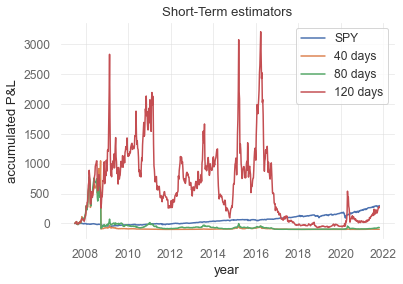

In [45]:
x = weights[0][0].index[::5]
plt.plot(x,pnl_df['SPY'].cumsum()[::5],label = 'SPY')
plt.plot(x,pnl_df['P&L Lookback: 40'].cumsum()[::5], label = '40 days')
plt.plot(x,pnl_df['P&L Lookback: 80'].cumsum()[::5],label = '80 days')
plt.plot(x,pnl_df['P&L Lookback: 120'].cumsum()[::5],label = '120 days')
plt.xlabel('year')
plt.ylabel('accumulated P&L')
plt.title('Short-Term estimators')
plt.legend(loc = 'best')

C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nhat Pham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

<AxesSubplot:xlabel='Return Lookback: 120', ylabel='Density'>

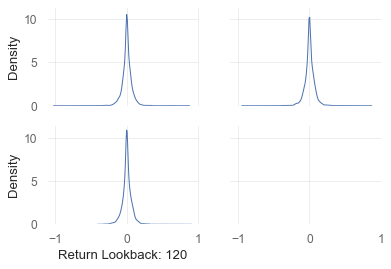

In [46]:
fig, axes = plt.subplots(2, 2,sharex= True, sharey = True)
sns.distplot(return_df['Return Lookback: 40'],ax= axes[0][0], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'Short-Term estimators')  
sns.distplot(return_df['Return Lookback: 80'],ax= axes[0][1], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'Mid-Term estimators')  
sns.distplot(return_df['Return Lookback: 120'],ax= axes[1][0], hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = 'Long-Term estimators')